#                                                 Olympic Medal Distribution Analysis

## Table of Contents

- Introduction
- Description of the Dataset
- Objective 1
    - Data Preprocessing
    - Exploratory Data Analysis
    - Objective 1 Summary
- Objective 2
    - Data Preprocessing Part 1
    - Exploratory Data Analysis Part 1
    - Data Preprocessing Part 2
    - Exploratory Data Analysis Part 2
    - Objective 2 Summary
- Objective 3
    - Supplementary Data Collection
    - Data Preprocessing
    - Data Visualization
    - Objective 3 Summary
- Objective 4
    - Data Preprocessing Part 1
    - Exploratory Data Analysis
    - Data Preprocessing Part 2
    - Correlation Analysis
    - Regression Analysis
    - Objective 4 Summary
- Objective 5
    - Data Preprocessing Part 1
    - Correlation Analysis
    - Regression Analysis
    - Data Preprocessing Part 2
    - Clustering and PCA Analysis
    - Objective 5 Summary
- References

## Introduction

Analyzing Olympics data on medals, athletes, and GDP provides a comprehensive overview of how economic and social factors influence global sports. 
It reveals hidden patterns, fosters international cooperation, promotes equity and helps shape future strategies. Data-driven insights
from these analyses can enhance decision-making and contribute to the growth and development of sports worldwide. The Olympics encourage a healthy lifestyle for athletes and everyone else who gets involved; it brings our audience together in a cheery spirit. It promotes national recognition and success. This report will contain the participation trends of the athletes and see if each is being representedequally. Each trend will have a comparison between the Summer and Winter Olympics datasets, and it will give insights into how the medals are distributed across each country.

## Description of the Dataset

To investigate the guiding questions, the following datasets will be explored.
**Olympics Dataset**, collected by Ronnie Chan and made available on GitHub [1] by scraping olympedia.org. Includes the following tables in .csv text format:
- **athletes.csv**, including descriptions of the athletes’ physical characteristics (gender,height, weight, etc) as well as the event(s) they competed in, any medals they won, and the country they competed for
- **medalists.csv**, included the information on data from year 2024.
- **host_cities.csv**, a list of Olympic host cities from 1896 to 2032 for Summer and Winter
- **noc_countries.csv**, an index with a three-letter abbreviation for each competing country

While the other three files provide important ancillary data, the most important table within this
dataset, for analyses pursuant to four of our objectives, is athletes.csv. This file is about 75
MB and contains about 476,000 rows, describing the characteristics of about 155,000 athletes
and their medals across 122 sporting categories.

An Entity Relationship Diagram was provided with this dataset, referenced in the appendix of
this report [Fig. 1], generated by Ronnie Chan using PostgreSQL and dbdiagram.io. Both this
diagram and the associated data it describes are used with permission under the MIT License. [2]
While the Ronnie Chan data is excellent, it does not include the most recent 2024 Paris Summer
Games. Therefore, to include the most recent events in the analysis, athletes.csv is to be
supplemented with medalists.csv, containing similar athlete information for the Paris 2024
Games. It is available from Kaggle [3] under the Creative Commons license. [4]

Another supporting file, which will be necessary to explore our fifth guiding question, contains
GDP estimates by country for the years 2022 and 2024 by both the United Nations and the
International Monetary Fund. The data was collected by World Population Review [5] and is
available for our use under their terms. [6] Furthermore, historical data for years prior to 2022
are available for collection on the respective UN and IMF websites. [7][8]

A table from wikipedia **committee.csv**, containing the information on the number of participants from each country in Paris Olympics 2024 and the number of medals won was extracted to analyse their relationship and build a regression model. [9]. Text is available under the Creative Commons Attribution-ShareAlike 4.0 License.[10]

Finally, Historical Olympic Medals Data (1994-2024) dataset offers an extensive collection of medal data from the Olympic Games spanning from 1994 to 2024. This dataset was initially contributed by Youssef Ismail [11]. The dataset is licensed under the Attribution 4.0 International (CC BY 4.0) license.[12] The dataset provides a detailed breakdown of the medals awarded across both Summer and Winter Olympics, capturing the achievements of participating countries over a 30-year period. For our analysis, we used the following files: **2004_athens_olympics_nations_medals.csv**, **2008_beijing_olympics_nations_medals.csv**, **2012_london_olympics_nations_medals.csv**, **2016_rio_olympics_nations_medals.csv**, and **2020_tokyo_olympics_nations_medals.csv**. These files represent the number of gold, silver, and bronze medals won by each country in the given Olympic Games.

## Objective 1
The first objective of this project will be **analyzing the Olympic medal distribution and
identifying the top 10 countries that have had more medals in the last 20 years** in the
Summer and Winter Olympics. It is important for boosting national pride, reflecting
national interests in sports, and identifying successful training programs.

In [2]:
!pip install plotly

In [5]:
!pip install scikit-learn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.2/11.0 MB 4.5 MB/s eta 0:00:03
   - -------------------------------------- 0.5/11.0 MB 6.2 MB/s eta 0:00:02
   ---- ----------------------------------- 1.3/11.0 MB 11.5 MB/s eta 0:00:01
   --------- ------------------------------ 2.5/11.0 MB 14.6 MB/s eta 0:00:01
   ----------- ---------------------------- 3.3/11.0 MB 14.8 MB/s eta 0:00:01
   ------------ --------------------------- 3.5/11.0 MB 13.8 MB/s eta 0:00:01
   ------------ --------------------------- 3.5/11.0 MB 13.8 MB/s eta 0:00:01
   ------------ --------------------------- 3.5/11.0 MB 13.8 MB/s eta 0:00:01
   ------------ --------------------------- 3.5/11.0 MB 13.8 MB/s eta 0:00:01
   ------------ --------------------------- 3.5/11.0 MB 13.8 MB/s eta 0:00:01
   ------------ --------------------------- 3.5/11.0 MB 13.8 MB/s eta 0:00:01
   ------------ --------------------------- 3.5/11.0 MB 13.8 MB/s eta 0:00

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.5 which is incompatible.
ydata-profiling 4.6.4 requires numpy<1.26,>=1.16.0, but you have numpy 1.26.3 which is incompatible.

[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install sklearn
#print(sklearn.__version__)


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

import seaborn as sns
import plotly.express as px
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from matplotlib.ticker import FuncFormatter

mpl.rcParams['figure.dpi'] = 400

### Data Preprocessing

In [6]:
# load dataset
athletes_df = pd.read_csv('../data/raw/athletes_data_raw.csv')
medalists_df= pd.read_csv('../data/raw/medalists_data_raw.csv')

In [7]:
# preview of athlete dataset
athletes_df.head()

,id,name,gender,born,died,height,weight,team,game,noc,sport,event,medal
0,131892,Meryem Erdoğan,Female,24 April 1990,NaN,172 cm,55 kg,Türkiye,2016 Summer Olympics,TUR,Athletics,"Athletics, Marathon, Women(Olympic)",NaN
1,131892,Meryem Erdoğan,Female,24 April 1990,NaN,172 cm,55 kg,Türkiye,2020 Summer Olympics,TUR,Athletics,"Athletics, Marathon, Women(Olympic)",NaN
2,131892,Meryem Erdoğan,Female,24 April 1990,NaN,172 cm,55 kg,Türkiye,2020 Summer Olympics,TUR,Athletics,"Athletics, Marathon, Women(Olympic)",NaN
3,4300,Maurice Maina,Male,1 January 1963,NaN,158 cm,47 kg,Kenya,1988 Summer Olympics,KEN,Boxing,"Boxing, Light-Flyweight, Men(Olympic)",NaN
4,4300,Maurice Maina,Male,1 January 1963,NaN,158 cm,47 kg,Kenya,1988 Summer Olympics,KEN,Boxing,"Boxing, Light-Flyweight, Men(Olympic)",NaN


In [8]:
# from game column separate year and type from game and removing spaces from before and after the type extraction
athletes_df['year'] = athletes_df['game'].str.extract(r'(\d{4})')  # Extract year (4-digit number)
athletes_df['type'] = athletes_df['game'].str.extract(r'(\D+)$')  # Extract type (non-digit characters)

# Remove spaces from 'type' column
athletes_df['type'] = athletes_df['type'].str.strip()
athletes_df.head()

,id,name,gender,born,died,height,weight,team,game,noc,sport,event,medal,year,type
0,131892,Meryem Erdoğan,Female,24 April 1990,NaN,172 cm,55 kg,Türkiye,2016 Summer Olympics,TUR,Athletics,"Athletics, Marathon, Women(Olympic)",NaN,2016,Summer Olympics
1,131892,Meryem Erdoğan,Female,24 April 1990,NaN,172 cm,55 kg,Türkiye,2020 Summer Olympics,TUR,Athletics,"Athletics, Marathon, Women(Olympic)",NaN,2020,Summer Olympics
2,131892,Meryem Erdoğan,Female,24 April 1990,NaN,172 cm,55 kg,Türkiye,2020 Summer Olympics,TUR,Athletics,"Athletics, Marathon, Women(Olympic)",NaN,2020,Summer Olympics
3,4300,Maurice Maina,Male,1 January 1963,NaN,158 cm,47 kg,Kenya,1988 Summer Olympics,KEN,Boxing,"Boxing, Light-Flyweight, Men(Olympic)",NaN,1988,Summer Olympics
4,4300,Maurice Maina,Male,1 January 1963,NaN,158 cm,47 kg,Kenya,1988 Summer Olympics,KEN,Boxing,"Boxing, Light-Flyweight, Men(Olympic)",NaN,1988,Summer Olympics


In [9]:
# Dropping duplicates based on specific columns and keeping the first occurrence
# also to ensure that only one medal per team is considered (even if multiple team members win medals)
athletes_df = athletes_df.drop_duplicates(subset=['team','id', 'name', 'gender', 'born', 'died', 'height', 'weight', 'game', 'noc', 'sport', 'event', 'medal', 'year', 'type'], keep='first')

# also drop columns that are not needed in analysis.
## dropping born ,died, height, weight colums as not needed in analysis.
columns_to_drop = ['born', 'died', 'height', 'weight','game','gender']
for column in columns_to_drop:
    if column in athletes_df.columns:
        athletes_df = athletes_df.drop(columns=column)
# Display the first few rows after removing duplicates
athletes_df.head()

,id,name,team,noc,sport,event,medal,year,type
0,131892,Meryem Erdoğan,Türkiye,TUR,Athletics,"Athletics, Marathon, Women(Olympic)",NaN,2016,Summer Olympics
1,131892,Meryem Erdoğan,Türkiye,TUR,Athletics,"Athletics, Marathon, Women(Olympic)",NaN,2020,Summer Olympics
3,4300,Maurice Maina,Kenya,KEN,Boxing,"Boxing, Light-Flyweight, Men(Olympic)",NaN,1988,Summer Olympics
5,60239,Stanislav Tůma,Czechoslovakia,TCH,Wrestling,"Wrestling, Featherweight, Freestyle, Men(Olympic)",NaN,1972,Summer Olympics
7,129369,Eunice Kirwa,Bahrain,BRN,Athletics,"Athletics, Marathon, Women(Olympic)",Silver,2016,Summer Olympics


In [10]:
athletes_df.shape

(318961, 9)

In [11]:
# Remove rows where the 'medal' column is empty or NaN
athletes_df = athletes_df.dropna(subset=['medal'])

# If 'medal' has empty strings or non-NaN blanks, you can filter them out like this:
#athletes_df = athletes_df[athletes_df['medal'].str.strip() != '']

# Display the first few rows after removing rows without medals
athletes_df.head()

,id,name,team,noc,sport,event,medal,year,type
7,129369,Eunice Kirwa,Bahrain,BRN,Athletics,"Athletics, Marathon, Women(Olympic)",Silver,2016,Summer Olympics
22,101764,Park Hye-Won,Republic of Korea,KOR,Short Track Speed Skating (Skating),"Short Track Speed Skating (Skating), 3,000 met...",Gold,2002,Winter Olympics
39,59207,Lee Jeong-Geun,Republic of Korea,KOR,Wrestling,"Wrestling, Featherweight, Freestyle, Men(Olympic)",Bronze,1984,Summer Olympics
63,37709,Kerstin Müller,Germany,GER,Rowing,"Rowing, Quadruple Sculls, Women(Olympic)",Gold,1992,Summer Olympics
65,7999,Laurie Stevens,South Africa,RSA,Boxing,"Boxing, Lightweight, Men(Olympic)",Gold,1932,Summer Olympics


In [12]:
# checking for the null columns count
athletes_df.isnull().sum()

id       0
name     0
team     0
noc      0
sport    0
event    0
medal    0
year     0
type     0
dtype: int64

In [13]:
athletes_df.shape

(44202, 9)

In [14]:
# preview of 2nd dataset - medalist dataset
medalists_df.head()

,medal_date,medal_type,medal_code,name,gender,country_code,country,country_long,nationality_code,nationality,...,team,team_gender,discipline,event,event_type,url_event,birth_date,code_athlete,code_team,is_medallist
0,2024-07-27,Gold Medal,1.0,EVENEPOEL Remco,Male,BEL,Belgium,Belgium,BEL,Belgium,...,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,2000-01-25,1903136,NaN,True
1,2024-07-27,Silver Medal,2.0,GANNA Filippo,Male,ITA,Italy,Italy,ITA,Italy,...,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1996-07-25,1923520,NaN,True
2,2024-07-27,Bronze Medal,3.0,van AERT Wout,Male,BEL,Belgium,Belgium,BEL,Belgium,...,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1994-09-15,1903147,NaN,True
3,2024-07-27,Gold Medal,1.0,BROWN Grace,Female,AUS,Australia,Australia,AUS,Australia,...,NaN,NaN,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1992-07-07,1940173,NaN,True
4,2024-07-27,Silver Medal,2.0,HENDERSON Anna,Female,GBR,Great Britain,Great Britain,GBR,Great Britain,...,NaN,NaN,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1998-11-14,1912525,NaN,True


In [15]:
# change columns names:
# medal_date to year only , medal_type to medal,country_code to noc, and add one column named type and valuesin there 'Summer Olympics' 

# Renaming column 
medalists_df = medalists_df.rename(columns={
    'medal_date': 'year',
    'medal_type': 'medal',
    'country_code': 'noc',
    'code_athlete': 'id',
    'discipline':'sport'
})

# Extract the year from 'year' (previously 'medal_date') column
medalists_df['year'] = medalists_df['year'].str[:4]

# Add a new column 'type' with the value 'Summer Olympics'
medalists_df['type'] = 'Summer Olympics'.strip()

In [16]:
# also in medal column remove 'Medal' from each value -
# example - Gold Medal to Gold.

medalists_df['medal'] = medalists_df['medal'].str.split().str[0]

medalists_df.head()

,year,medal,medal_code,name,gender,noc,country,country_long,nationality_code,nationality,...,team_gender,sport,event,event_type,url_event,birth_date,id,code_team,is_medallist,type
0,2024,Gold,1.0,EVENEPOEL Remco,Male,BEL,Belgium,Belgium,BEL,Belgium,...,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,2000-01-25,1903136,NaN,True,Summer Olympics
1,2024,Silver,2.0,GANNA Filippo,Male,ITA,Italy,Italy,ITA,Italy,...,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1996-07-25,1923520,NaN,True,Summer Olympics
2,2024,Bronze,3.0,van AERT Wout,Male,BEL,Belgium,Belgium,BEL,Belgium,...,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1994-09-15,1903147,NaN,True,Summer Olympics
3,2024,Gold,1.0,BROWN Grace,Female,AUS,Australia,Australia,AUS,Australia,...,NaN,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1992-07-07,1940173,NaN,True,Summer Olympics
4,2024,Silver,2.0,HENDERSON Anna,Female,GBR,Great Britain,Great Britain,GBR,Great Britain,...,NaN,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1998-11-14,1912525,NaN,True,Summer Olympics


In [17]:
medalists_df.isnull().sum()

year                  0
medal                 0
medal_code            1
name                  0
gender                0
noc                   0
country               0
country_long          0
nationality_code      1
nationality           1
nationality_long      1
team                760
team_gender         760
sport                 0
event                 0
event_type            0
url_event            21
birth_date            0
id                    0
code_team           760
is_medallist          0
type                  0
dtype: int64

In [18]:
# dropping columns that are not used in analysis
columns_to_keep = ['id', 'name', 'team', 'noc', 'sport', 'event', 'medal', 'year', 'type']

# Drop the rest of the columns
medalists_df = medalists_df[columns_to_keep]

# Display the resulting DataFrame
medalists_df.head()

,id,name,team,noc,sport,event,medal,year,type
0,1903136,EVENEPOEL Remco,NaN,BEL,Cycling Road,Men's Individual Time Trial,Gold,2024,Summer Olympics
1,1923520,GANNA Filippo,NaN,ITA,Cycling Road,Men's Individual Time Trial,Silver,2024,Summer Olympics
2,1903147,van AERT Wout,NaN,BEL,Cycling Road,Men's Individual Time Trial,Bronze,2024,Summer Olympics
3,1940173,BROWN Grace,NaN,AUS,Cycling Road,Women's Individual Time Trial,Gold,2024,Summer Olympics
4,1912525,HENDERSON Anna,NaN,GBR,Cycling Road,Women's Individual Time Trial,Silver,2024,Summer Olympics


In [19]:
medalists_df.shape

(2315, 9)

In [20]:
# medalist identify the duplicates keeping the first row based on mentioned subsets
medalists_df=medalists_df.drop_duplicates(subset=['year','medal','noc','team','sport','event','type'],keep='first')

In [21]:
medalists_df.shape

(1044, 9)

In [22]:
medalists_df.isnull().sum()

id         0
name       0
team     760
noc        0
sport      0
event      0
medal      0
year       0
type       0
dtype: int64

In [23]:
# check if there are any duplictae rows
duplicate_rows = medalists_df[medalists_df.duplicated(keep=False)]

# Display the duplicate rows if any
if not duplicate_rows.empty:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


#### Merging cleaned datasets 
This merging is important because the atheletes_df only consists of data till 2023 and the medalists_df have the 2024 olympics data.
                                                        

In [25]:
# Combine the two DataFrames
Olympics_medalists_data = pd.concat([athletes_df, medalists_df], ignore_index=True)

# Optionally, you might want to sort the data by a specific column (e.g., date)
Olympics_medalists_data.sort_values(by='year', inplace=True)

# Save the combined DataFrame to a new file
Olympics_medalists_data.to_csv('Olympics_medalists_data.csv', index=False)

print("Data combined successfully!")
Olympics_medalists_data.head()

Data combined successfully!


,id,name,team,noc,sport,event,medal,year,type
13389,22382,Leon Pyrgos,Greece,GRE,Fencing,"Fencing, Foil, Masters, Individual, Men(Olympic)",Gold,1896,Summer Olympics
12490,226,Momcsilló Tapavicza,Hungary,HUN,Tennis,"Tennis, Singles, Men(Olympic)",Bronze,1896,Summer Olympics
21284,15116,Georgios Koletis,Greece,GRE,Cycling Track (Cycling),"Cycling Track (Cycling), 100 kilometres, Men(O...",Silver,1896,Summer Olympics
16041,30338,Dimitrios Loundras,Greece,GRE,Artistic Gymnastics (Gymnastics),"Artistic Gymnastics (Gymnastics), Parallel Bar...",Bronze,1896,Summer Olympics
5827,68538,Alexandre Tuffèri,France Greece,FRA,Athletics,"Athletics, Triple Jump, Men(Olympic)",Silver,1896,Summer Olympics


In [26]:
Olympics_medalists_data.shape

(45246, 9)

In [27]:
Olympics_medalists_data.isnull().sum()

id         0
name       0
team     760
noc        0
sport      0
event      0
medal      0
year       0
type       0
dtype: int64

Since the analysis was focused on the last 20 years of Olympic history, filtered both datasets to only include medals won between 2004 and 2024. This allows to focus on the most recent competitions and accurately reflect modern Olympic trends.

In [29]:
# filter dataset from year 2004 to 2024
Olympics_medalists_data['year'] = pd.to_numeric(Olympics_medalists_data['year'], errors='coerce')
filtered_dataset = Olympics_medalists_data[(Olympics_medalists_data['year'] >= 2004) & (Olympics_medalists_data['year'] <= 2024)]
filtered_dataset.head()

,id,name,team,noc,sport,event,medal,year,type
32497,105037,Novlene Williams-Mills,Jamaica,JAM,Athletics,"Athletics, 4 × 400 metres Relay, Women(Olympic)",Bronze,2004,Summer Olympics
30180,18983,Björn Emmerling,Germany,GER,Hockey,"Hockey, Hockey, Men(Olympic)",Bronze,2004,Summer Olympics
37049,93233,Crystl Bustos,United States,USA,Softball (Baseball/Softball),"Softball (Baseball/Softball), Softball, Women(...",Gold,2004,Summer Olympics
37023,105898,Zhou Mi,People's Republic of China,CHN,Badminton,"Badminton, Singles, Women(Olympic)",Bronze,2004,Summer Olympics
35921,104444,Sergey Fedorovtsev,Russian Federation,RUS,Rowing,"Rowing, Quadruple Sculls, Men(Olympic)",Gold,2004,Summer Olympics


### Exploratory Data Analysis
Two separate visualization on the Winter and Summer Olympics Given that the Summer and Winter Olympics.

In [31]:
# separating summer and winter olympics
summer_olympics = filtered_dataset[filtered_dataset['type'] == 'Summer Olympics']
print("Summer Olympics Data:")
print(summer_olympics.head())

winter_olympics = filtered_dataset[filtered_dataset['type'] == 'Winter Olympics']
print("Winter Olympics Data:")
print(winter_olympics.head())

Summer Olympics Data:
           id                    name                        team  noc  \
32497  105037  Novlene Williams-Mills                     Jamaica  JAM   
30180   18983         Björn Emmerling                     Germany  GER   
37049   93233           Crystl Bustos               United States  USA   
37023  105898                 Zhou Mi  People's Republic of China  CHN   
35921  104444      Sergey Fedorovtsev          Russian Federation  RUS   

                              sport  \
32497                     Athletics   
30180                        Hockey   
37049  Softball (Baseball/Softball)   
37023                     Badminton   
35921                        Rowing   

                                                   event   medal  year  \
32497    Athletics, 4 × 400 metres Relay, Women(Olympic)  Bronze  2004   
30180                       Hockey, Hockey, Men(Olympic)  Bronze  2004   
37049  Softball (Baseball/Softball), Softball, Women(...    Gold  2004   
37

For Summer Olympics

In [33]:
summer_olympics = summer_olympics.copy()
summer_olympics.loc[summer_olympics['noc'] == 'ROC', 'noc'] = 'RUS'

# Create a rule where we count only one medal per team for team events
# We will group by both 'noc' and 'event' to count only one medal per event per country (NOC)
summer_medal_counts = summer_olympics.drop_duplicates(subset=['noc', 'event', 'medal'])  # Remove duplicates in team events
summer_medal_counts = summer_medal_counts.groupby('noc')['medal'].count().reset_index().sort_values(by='medal', ascending=False)
summer_medal_counts.head()

,noc,medal
123,USA,467
21,CHN,342
44,GBR,277
100,RUS,257
42,FRA,213


In [34]:
# for the winter olympics

winter_olympics = winter_olympics.copy()

# Create a rule where we count only one medal per team for team events
# We will group by both 'noc' and 'event' to count only one medal per event per country (NOC)
winter_medal_counts = winter_olympics.drop_duplicates(subset=['noc', 'event', 'medal'])  # Remove duplicates in team events
winter_medal_counts = winter_medal_counts.groupby('noc')['medal'].count().reset_index().sort_values(by='medal', ascending=False)
winter_medal_counts.head()

,noc,medal
33,USA,100
23,NOR,95
5,CAN,94
14,GER,90
1,AUT,63


In [35]:
print("Top 10n countries for Summer Olympics:")
print(summer_medal_counts.head(10))

print("\nTop 10n countries for Winter Olympics:")
print(winter_medal_counts.head(10))

Top 10n countries for Summer Olympics:
     noc  medal
123  USA    467
21   CHN    342
44   GBR    277
100  RUS    257
42   FRA    213
6    AUS    212
46   GER    202
63   JPN    190
60   ITA    164
67   KOR    131

Top 10n countries for Winter Olympics:
    noc  medal
33  USA    100
23  NOR     95
5   CAN     94
14  GER     90
1   AUT     63
31  SWE     60
27  RUS     59
29  SUI     49
12  FRA     46
16  ITA     44


In [36]:
# colur coding for ecah country
# Unique country codes and corresponding colors
unique_country_code = summer_medal_counts['noc'].unique()
color_code = [
    "#FF6633", "#FFB399", "#FF33FF", "#FFFF99", "#00B3E6",
    "#E6B333", "#3366E6", "#999966", "#99FF99", "#B34D4D",
    "#80B300", "#809900", "#E6B3B3", "#6680B3", "#66991A",
    "#FF99E6", "#CCFF1A", "#FF1A66", "#E6331A", "#33FFCC",
    "#66994D", "#B366CC", "#4D8000", "#B33300", "#CC80CC",
    "#66664D", "#991AFF", "#E666FF", "#4DB3FF", "#1AB399",
    "#E666B3", "#33991A", "#CC9999", "#B3B31A", "#00E680",
    "#4D8066", "#809980", "#E6FF80", "#1AFF33", "#999933",
    "#FF3380", "#CCCC00", "#66E64D", "#4D80CC", "#9900B3",
    "#E64D66", "#4DB380", "#FF4D4D", "#99E6E6", "#6666FF",
    "#003366", "#663399", "#FF6666", "#66CCFF", "#669999",
    "#FF9966", "#66FF33", "#CC3333", "#FFCC00", "#336666",
    "#33CCCC", "#99CC33", "#FF66CC", "#99CCCC", "#996699",
    "#FF99CC", "#CCCC99", "#9999CC", "#33CC66", "#FF6666",
    "#3366FF", "#9999FF", "#666633", "#CC9966", "#663333",
    "#3399FF", "#FF9966", "#FF6699", "#33FF99", "#6699FF",
    "#9966FF", "#FF9966", "#669933", "#99FF66", "#33FFCC",
    "#9933FF", "#99FFCC", "#33CCFF", "#9966CC", "#FF9933",
    "#66FF99", "#FFCC99", "#99CCFF", "#996633"
]

# Map the country codes to colors
#color_dict = {code: color_code[i] for i, code in enumerate(unique_country_code)}
color_dict = {code: color_code[i % len(color_code)] for i, code in enumerate(unique_country_code)}
# Assign colors to the dataframe based on country codes
summer_medal_counts['color'] = summer_medal_counts['noc'].map(color_dict)

AttributeError: Rectangle.set() got an unexpected keyword argument 'legend'

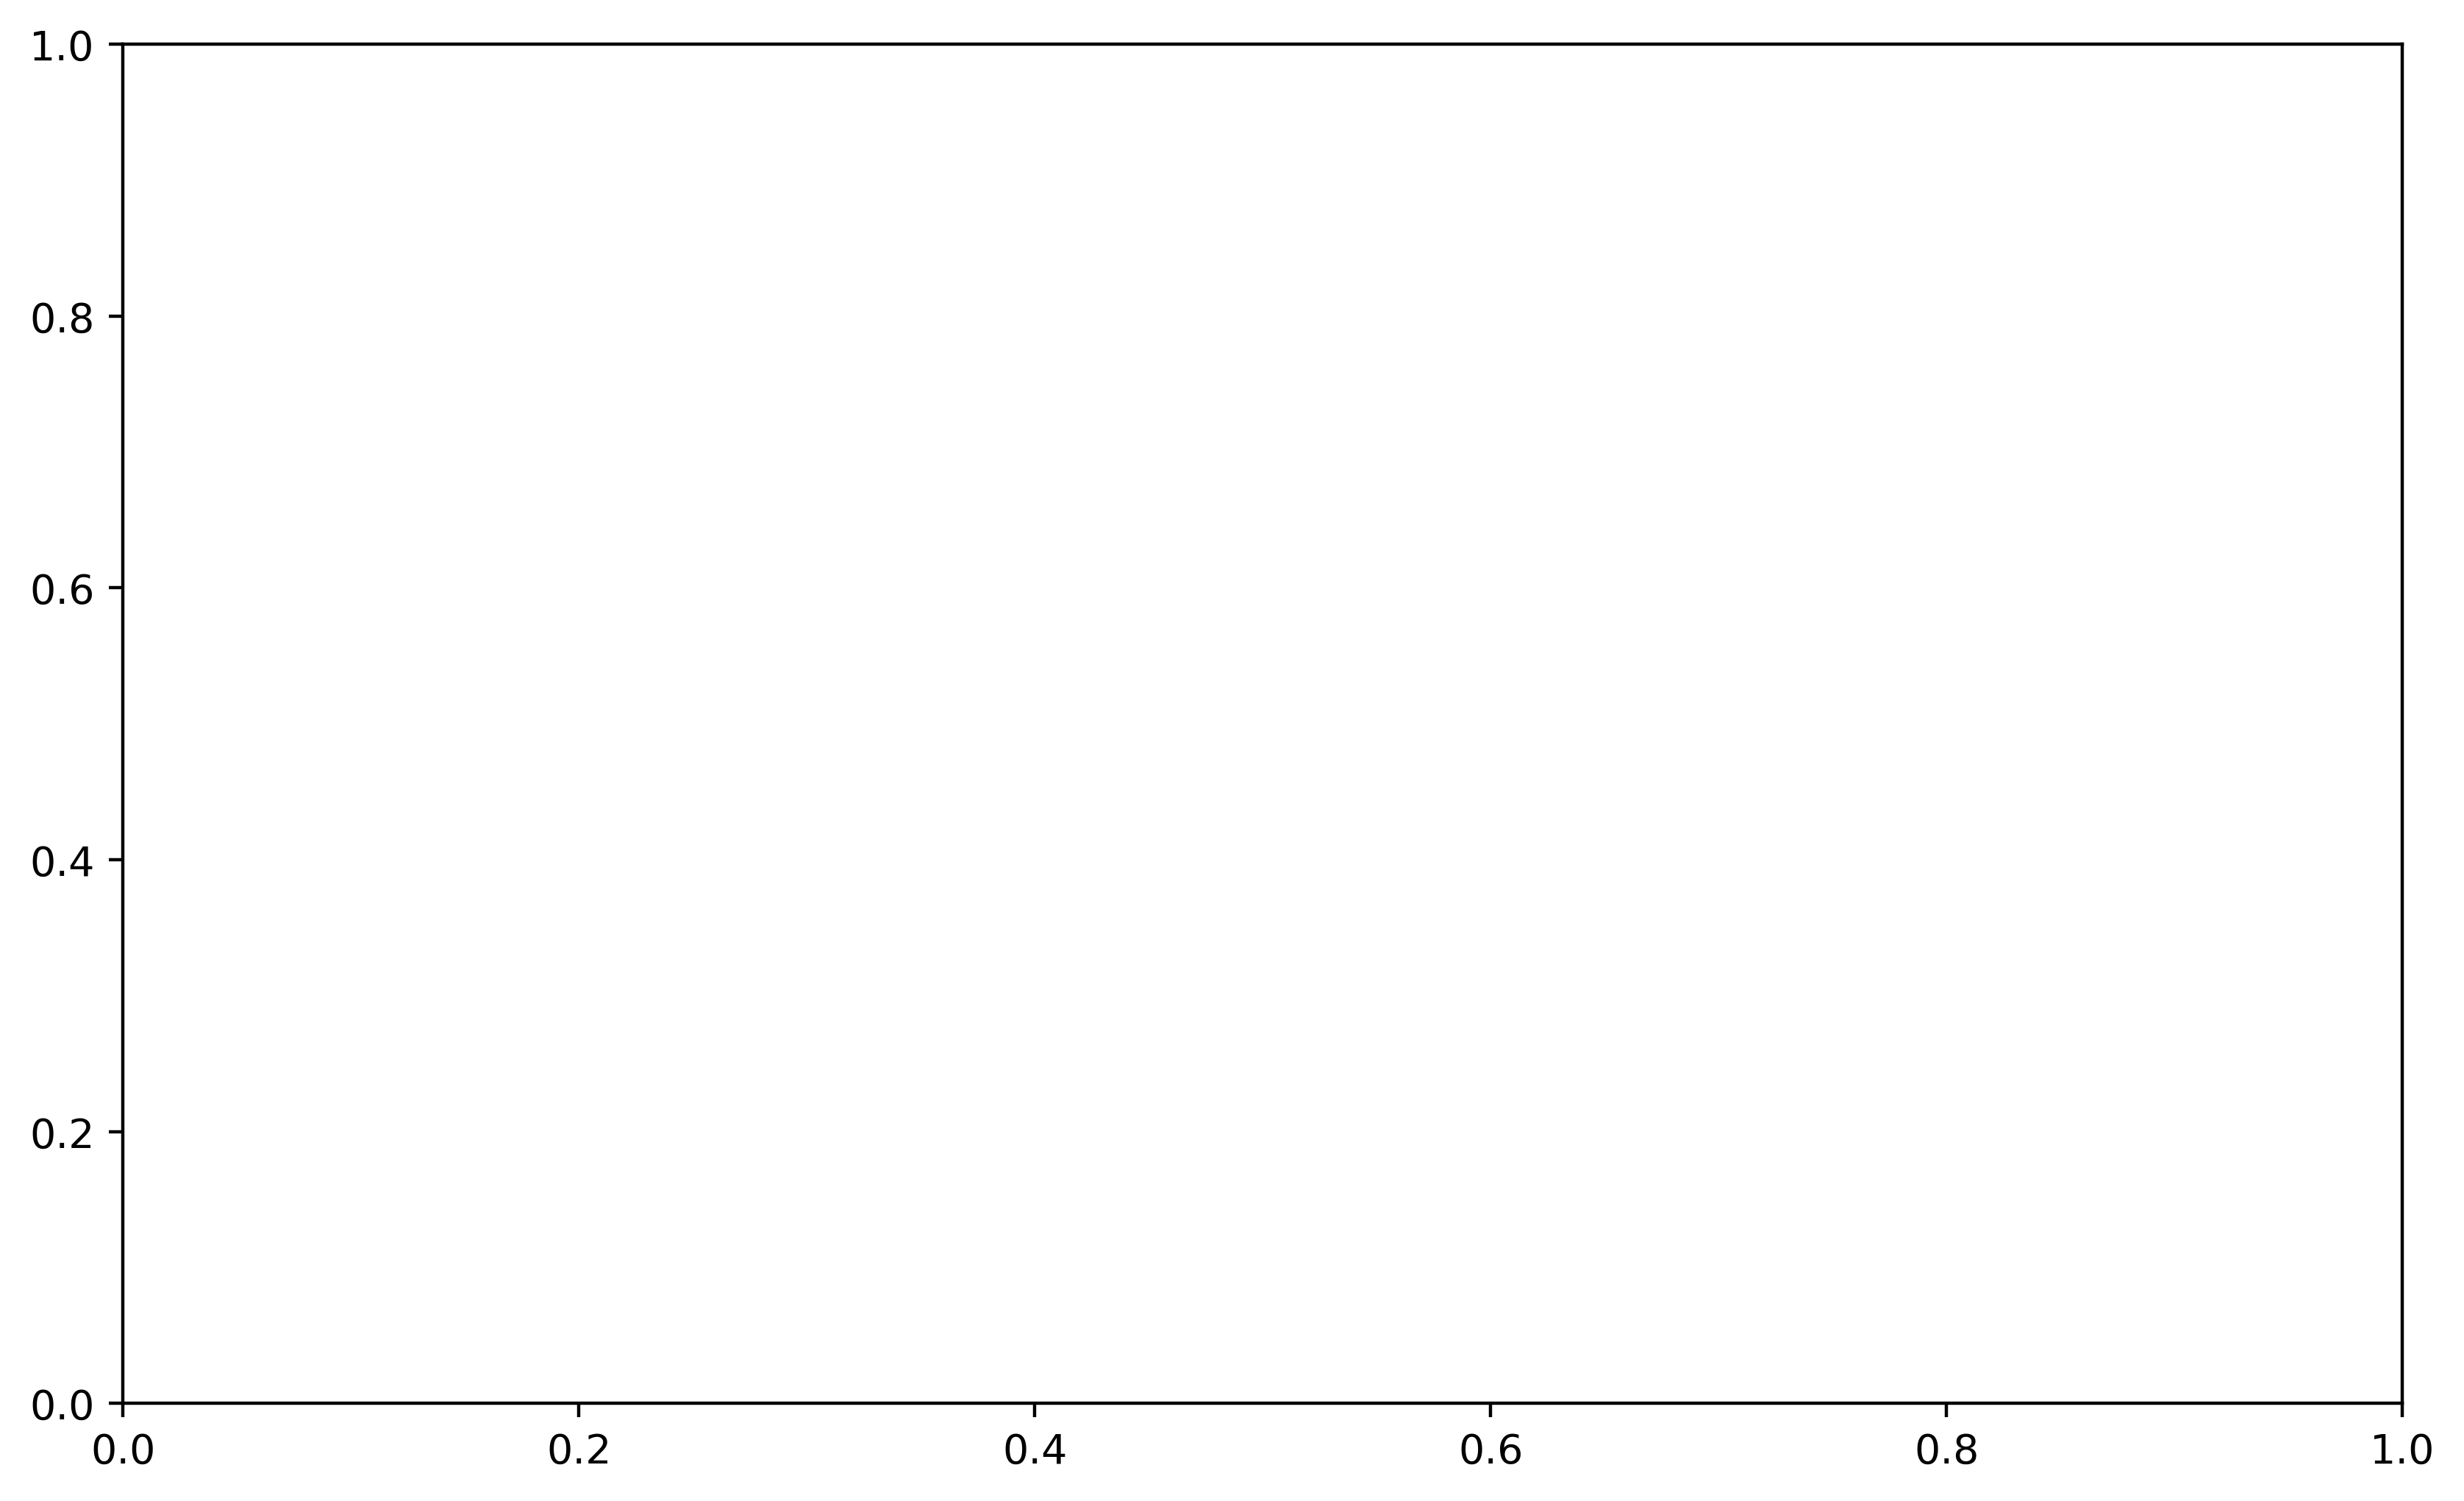

In [37]:
# Plot for Summer Olympics

# Plot with custom colors for countries
plt.figure(figsize=(10, 6))

# Get the top 10 countries
top_10_countries = summer_medal_counts.head(10)

#Extract colors for the top 10 countries from the color dictionary
colors = [color_dict[country] for country in top_10_countries['noc']]

sns.barplot(x='medal', y='noc', data=top_10_countries, hue='noc', palette=colors, legend=False)

plt.title('Top 10 Countries by Medal Count (Summer Olympics)')
plt.xlabel('Medal Count')
plt.ylabel('Country (NOC)')

# Load and place the image
img = mpimg.imread('../images/summerlogo.png')  # Replace with correct path to your image
imagebox = OffsetImage(img, zoom=0.3)
ab = AnnotationBbox(imagebox, (400, 6), xycoords='data', frameon=False)
ax = plt.gca()
ax.add_artist(ab)

plt.show()

This chart shows the top 10 countries in terms of medal count at the Summer Olympics. The **United States is the clear leader** with over 450 medals. **China comes in second place** with around 350 medals. **Great Britain is in third place** with around 275 medals. The remaining countries in the top 10 are Russia, France, Australia, Germany, Japan, Italy and South Korea. It's worth noting that **Russia's medal count has been decreasing in recent years, likely due to the country's involvement in doping scandals**.
The chart is accompanied by a graphic of the Olympic rings and the sun which is the logo of the Summer Olympics.

In [ ]:
## plot for the winter top 10 medalist countries

# Plot with custom colors for countries
plt.figure(figsize=(10, 6))
sns.barplot(x='medal', y='noc', data=winter_medal_counts.head(10), palette=[color_dict[code] for code in winter_medal_counts.head(10)['noc']], hue='noc', legend=False)
plt.title('Top 10 Countries by Medal Count (Winter Olympics)')
plt.xlabel('Medal Count')
plt.ylabel('Country (NOC)')

img2 = mpimg.imread('../images/winterlogo.jpg')

# Create the image object and place it on the bar chart
imagebox = OffsetImage(img2, zoom=0.1)
ab2 = AnnotationBbox(imagebox, (80, 6), xycoords='data', frameon=False)
ax2 = plt.gca()
# Add the image to the plot
ax2.add_artist(ab2)

plt.show()

This chart is useful for understanding which countries are most successful in winter Olympic sports for past 20 years.
The **United States is in first place** with a count of around 100 medals, **followed by Norway** with around 95, and **Canada** with around 90 medals. **Germany is in fourth place** with a count of around 85, while **Austria** has a count of approximately 65. **Sweden and Russia both have a same count** of around 60, while **Switzerland has a count of around 50**. France and Italy both have a count of around 45 medals.
This chart clearly represents the dominace of USA for medal cout over last 20 years.

In [ ]:
# Group medal counts by country and year for both Summer and Winter

summer_trends = summer_olympics.groupby(['year', 'noc'])['medal'].count().reset_index()
winter_trends = winter_olympics.groupby(['year', 'noc'])['medal'].count().reset_index()

In [ ]:
# Plot medal trends over time for the top 5 Summer countries

top_5_summer = summer_medal_counts.head(5)['noc'].tolist()
plt.figure(figsize=(10, 6))

for country in top_5_summer:
    country_data = summer_trends[summer_trends['noc'] == country]
    plt.plot(country_data['year'], country_data['medal'], label=country, color=color_dict[country])

plt.title('Medal Trends Over Time - Summer Olympics (Top 5 Countries)')
plt.xlabel('Year')
plt.ylabel('Medal Count')
plt.xticks(summer_trends['year'].unique())
plt.legend()
plt.show()

The graph shows the medal trends of the top 5 countries in the Summer Olympics over time. The **USA** has consistently **won the most medals**, with a peak in 2008. **China** has been **steadily increasing** their medal count, while the UK has seen a slight decline between 2016 and 2020.. **Russia has had a more inconsistent performance**, but was on the rise in 2020 before declining. **France's** medal count has been slowly but **steadily increasing.**

In [ ]:
# Plot medal trends over time for the top 5 Winter countries
top_5_winter = winter_medal_counts.head(5)['noc'].tolist()
plt.figure(figsize=(10, 6))
for country in top_5_winter:
    country_data = winter_trends[winter_trends['noc'] == country]
    plt.plot(country_data['year'], country_data['medal'], label=country, color=color_dict[country])

plt.title('Medal Trends Over Time - Winter Olympics (Top 5 Countries)')
plt.xlabel('Year')
plt.ylabel('Medal Count')
plt.legend()
plt.show()

The graph shows the medal trends over time for the top 5 countries in the Winter Olympics. The **USA** is consistently in the** lead**, followed by Norway, Canada, Germany, and Austria. The **USA experienced a peak in 2010**, while **Canada reached its peak in 2018**. **Germany's** performance has been more consistent, with a **steady decline from its peak in 2018**. **Austria** has maintained a relatively **steady performance**, while **Norway has shown a gradual increase in its medal count** over the years.
Overall, the graph reveals the competitive landscape of Winter Olympics, highlighting the dominance of the USA and the steady growth of Norway.

### Objective 1 Summary

The top 10 countries with the most medals in the last 20 years have not only been identified but also reveal the insights that inform further 
exploration into what makes these nations so successful and how emerging countries can learn from their strategies to claim their place on the
Olympic podium.

## Objective 2

This project will also **examine the ratio of men and women participation over the years** (i.e., evaluate whether the female-to-male ratio has been increasing over the years and identify if there is an over or under-representation of any gender). This analysis will help us understand whether the Olympics creates an inclusive space and provides men and women with equal opportunities in both the Summer and Winter Olympics.

### Data Preprocessing Part 1

In [19]:
athlete_df = pd.read_csv('../data/raw/athletes_data_raw.csv')
hosts_df = pd.read_csv('../data/raw/host_countries_raw.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.min_rows', None)

hosts_df.head()

,year,season,city,country,region,noc
0,1896,Summer,Athens,Greece,Europe,GRE
1,1900,Summer,Paris,France,Europe,FRA
2,1904,Summer,St. Louis,United States,North America,USA
3,1908,Summer,London,United Kingdom,Europe,GBR
4,1912,Summer,Stockholm,Sweden,Europe,SWE


In [20]:
athlete_df.head()

,id,name,gender,born,died,height,weight,team,game,noc,sport,event,medal
0,131892,Meryem Erdoğan,Female,24 April 1990,NaN,172 cm,55 kg,Türkiye,2016 Summer Olympics,TUR,Athletics,"Athletics, Marathon, Women(Olympic)",NaN
1,131892,Meryem Erdoğan,Female,24 April 1990,NaN,172 cm,55 kg,Türkiye,2020 Summer Olympics,TUR,Athletics,"Athletics, Marathon, Women(Olympic)",NaN
2,131892,Meryem Erdoğan,Female,24 April 1990,NaN,172 cm,55 kg,Türkiye,2020 Summer Olympics,TUR,Athletics,"Athletics, Marathon, Women(Olympic)",NaN
3,4300,Maurice Maina,Male,1 January 1963,NaN,158 cm,47 kg,Kenya,1988 Summer Olympics,KEN,Boxing,"Boxing, Light-Flyweight, Men(Olympic)",NaN
4,4300,Maurice Maina,Male,1 January 1963,NaN,158 cm,47 kg,Kenya,1988 Summer Olympics,KEN,Boxing,"Boxing, Light-Flyweight, Men(Olympic)",NaN


In [21]:
print(athlete_df.dtypes)

id         int64
name      object
gender    object
born      object
died      object
height    object
weight    object
team      object
game      object
noc       object
sport     object
event     object
medal     object
dtype: object


In [10]:
athlete_df.isna().sum()

id             0
name           0
gender         0
born        9316
died      359755
height    127511
weight    136329
team           0
game           0
noc            0
sport          0
event          0
medal     410322
dtype: int64

In [22]:
athlete_df.shape

(476348, 13)

In [23]:
athlete_df['born'] = pd.to_datetime(athlete_df['born'], errors='coerce') # Use errors='coerce' to handle invalid dates

# Print the updated DataFrame to check if the conversion was successful
print(athlete_df.dtypes)

id                 int64
name              object
gender            object
born      datetime64[ns]
died              object
height            object
weight            object
team              object
game              object
noc               object
sport             object
event             object
medal             object
dtype: object


In [24]:
duplicate_rows = athlete_df[athlete_df.duplicated()]

In [14]:
# Remove duplicate rows based on all columns
athlete_df = athlete_df.drop_duplicates()

print(athlete_df.shape)

(318961, 13)


In [25]:
num_duplicates = athlete_df.duplicated().sum()

print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 157387


In [26]:
# Drop multiple columns by passing them as a list to the 'labels' argument
athlete_df = athlete_df.drop(labels=['died', 'born', 'height', 'weight', 'name'], axis=1)

print(athlete_df.head())

       id  gender     team                  game  noc      sport  \
0  131892  Female  Türkiye  2016 Summer Olympics  TUR  Athletics   
1  131892  Female  Türkiye  2020 Summer Olympics  TUR  Athletics   
2  131892  Female  Türkiye  2020 Summer Olympics  TUR  Athletics   
3    4300    Male    Kenya  1988 Summer Olympics  KEN     Boxing   
4    4300    Male    Kenya  1988 Summer Olympics  KEN     Boxing   

                                   event medal  
0    Athletics, Marathon, Women(Olympic)   NaN  
1    Athletics, Marathon, Women(Olympic)   NaN  
2    Athletics, Marathon, Women(Olympic)   NaN  
3  Boxing, Light-Flyweight, Men(Olympic)   NaN  
4  Boxing, Light-Flyweight, Men(Olympic)   NaN  


In [27]:
# - replace medal values with zero that are Nan

# Fill NaN values in the 'medal' column with 0
athlete_df['medal'] = athlete_df['medal'].fillna("None")

print(athlete_df.head())


       id  gender     team                  game  noc      sport  \
0  131892  Female  Türkiye  2016 Summer Olympics  TUR  Athletics   
1  131892  Female  Türkiye  2020 Summer Olympics  TUR  Athletics   
2  131892  Female  Türkiye  2020 Summer Olympics  TUR  Athletics   
3    4300    Male    Kenya  1988 Summer Olympics  KEN     Boxing   
4    4300    Male    Kenya  1988 Summer Olympics  KEN     Boxing   

                                   event medal  
0    Athletics, Marathon, Women(Olympic)  None  
1    Athletics, Marathon, Women(Olympic)  None  
2    Athletics, Marathon, Women(Olympic)  None  
3  Boxing, Light-Flyweight, Men(Olympic)  None  
4  Boxing, Light-Flyweight, Men(Olympic)  None  


In [28]:
athlete_df.head()

,id,gender,team,game,noc,sport,event,medal
0,131892,Female,Türkiye,2016 Summer Olympics,TUR,Athletics,"Athletics, Marathon, Women(Olympic)",None
1,131892,Female,Türkiye,2020 Summer Olympics,TUR,Athletics,"Athletics, Marathon, Women(Olympic)",None
2,131892,Female,Türkiye,2020 Summer Olympics,TUR,Athletics,"Athletics, Marathon, Women(Olympic)",None
3,4300,Male,Kenya,1988 Summer Olympics,KEN,Boxing,"Boxing, Light-Flyweight, Men(Olympic)",None
4,4300,Male,Kenya,1988 Summer Olympics,KEN,Boxing,"Boxing, Light-Flyweight, Men(Olympic)",None


In [29]:
print(athlete_df.shape)

(476348, 8)


In [30]:
summer_df = athlete_df[athlete_df['game'].str.contains('Summer')]

In [31]:
summer_df.head()

,id,gender,team,game,noc,sport,event,medal
0,131892,Female,Türkiye,2016 Summer Olympics,TUR,Athletics,"Athletics, Marathon, Women(Olympic)",None
1,131892,Female,Türkiye,2020 Summer Olympics,TUR,Athletics,"Athletics, Marathon, Women(Olympic)",None
2,131892,Female,Türkiye,2020 Summer Olympics,TUR,Athletics,"Athletics, Marathon, Women(Olympic)",None
3,4300,Male,Kenya,1988 Summer Olympics,KEN,Boxing,"Boxing, Light-Flyweight, Men(Olympic)",None
4,4300,Male,Kenya,1988 Summer Olympics,KEN,Boxing,"Boxing, Light-Flyweight, Men(Olympic)",None


In [32]:
# this has the youth olympics removed
summer_df = summer_df[~summer_df['game'].str.contains('Youth')] # Remove Summer Youth Olympics
summer_df.head()

# Group by game and gender, and count the number of athletes
gender_game_counts = summer_df.groupby(['game', 'gender'])['gender'].count().unstack()

print(gender_game_counts)

gender                Female   Male
game                               
1896 Summer Olympics       4    816
1900 Summer Olympics     100   5101
1904 Summer Olympics      23   4346
1908 Summer Olympics     111   5835
1912 Summer Olympics     158   7765
1920 Summer Olympics     243   6620
1924 Summer Olympics     418   9326
1928 Summer Olympics     796   8237
1932 Summer Olympics     526   4404
1936 Summer Olympics     894  11272
1948 Summer Olympics    1053   9816
1952 Summer Olympics    2029  11767
1956 Summer Olympics    1168   6577
1960 Summer Olympics    1941  10768
1964 Summer Olympics    1934  10264
1968 Summer Olympics    2553  10900
1972 Summer Olympics    3200  13219
1976 Summer Olympics    3311  10528
1980 Summer Olympics    2819   8997
1984 Summer Olympics    3787  11505
1988 Summer Olympics    5445  13571
1992 Summer Olympics    5987  14214
1996 Summer Olympics    7323  13502
2000 Summer Olympics    8142  12841
2004 Summer Olympics    8391  12161
2008 Summer Olympics    8978

In [33]:
# Add a row for 2024 Summer Olympics with 5250 female and 5250 male
new_row = pd.DataFrame({'game': ['2024 Summer Olympics'], 'Female': [5250], 'Male': [5250]})
gender_game_counts = pd.concat([gender_game_counts, new_row.set_index('game')], axis=0)

print(gender_game_counts)

                      Female   Male
game                               
1896 Summer Olympics       4    816
1900 Summer Olympics     100   5101
1904 Summer Olympics      23   4346
1908 Summer Olympics     111   5835
1912 Summer Olympics     158   7765
1920 Summer Olympics     243   6620
1924 Summer Olympics     418   9326
1928 Summer Olympics     796   8237
1932 Summer Olympics     526   4404
1936 Summer Olympics     894  11272
1948 Summer Olympics    1053   9816
1952 Summer Olympics    2029  11767
1956 Summer Olympics    1168   6577
1960 Summer Olympics    1941  10768
1964 Summer Olympics    1934  10264
1968 Summer Olympics    2553  10900
1972 Summer Olympics    3200  13219
1976 Summer Olympics    3311  10528
1980 Summer Olympics    2819   8997
1984 Summer Olympics    3787  11505
1988 Summer Olympics    5445  13571
1992 Summer Olympics    5987  14214
1996 Summer Olympics    7323  13502
2000 Summer Olympics    8142  12841
2004 Summer Olympics    8391  12161
2008 Summer Olympics    8978

Made a new dataframe with 2024 summer olympics data about males to females. Used verified source [13]  to confirm this.




### Exploratory Data Analysis Part 1

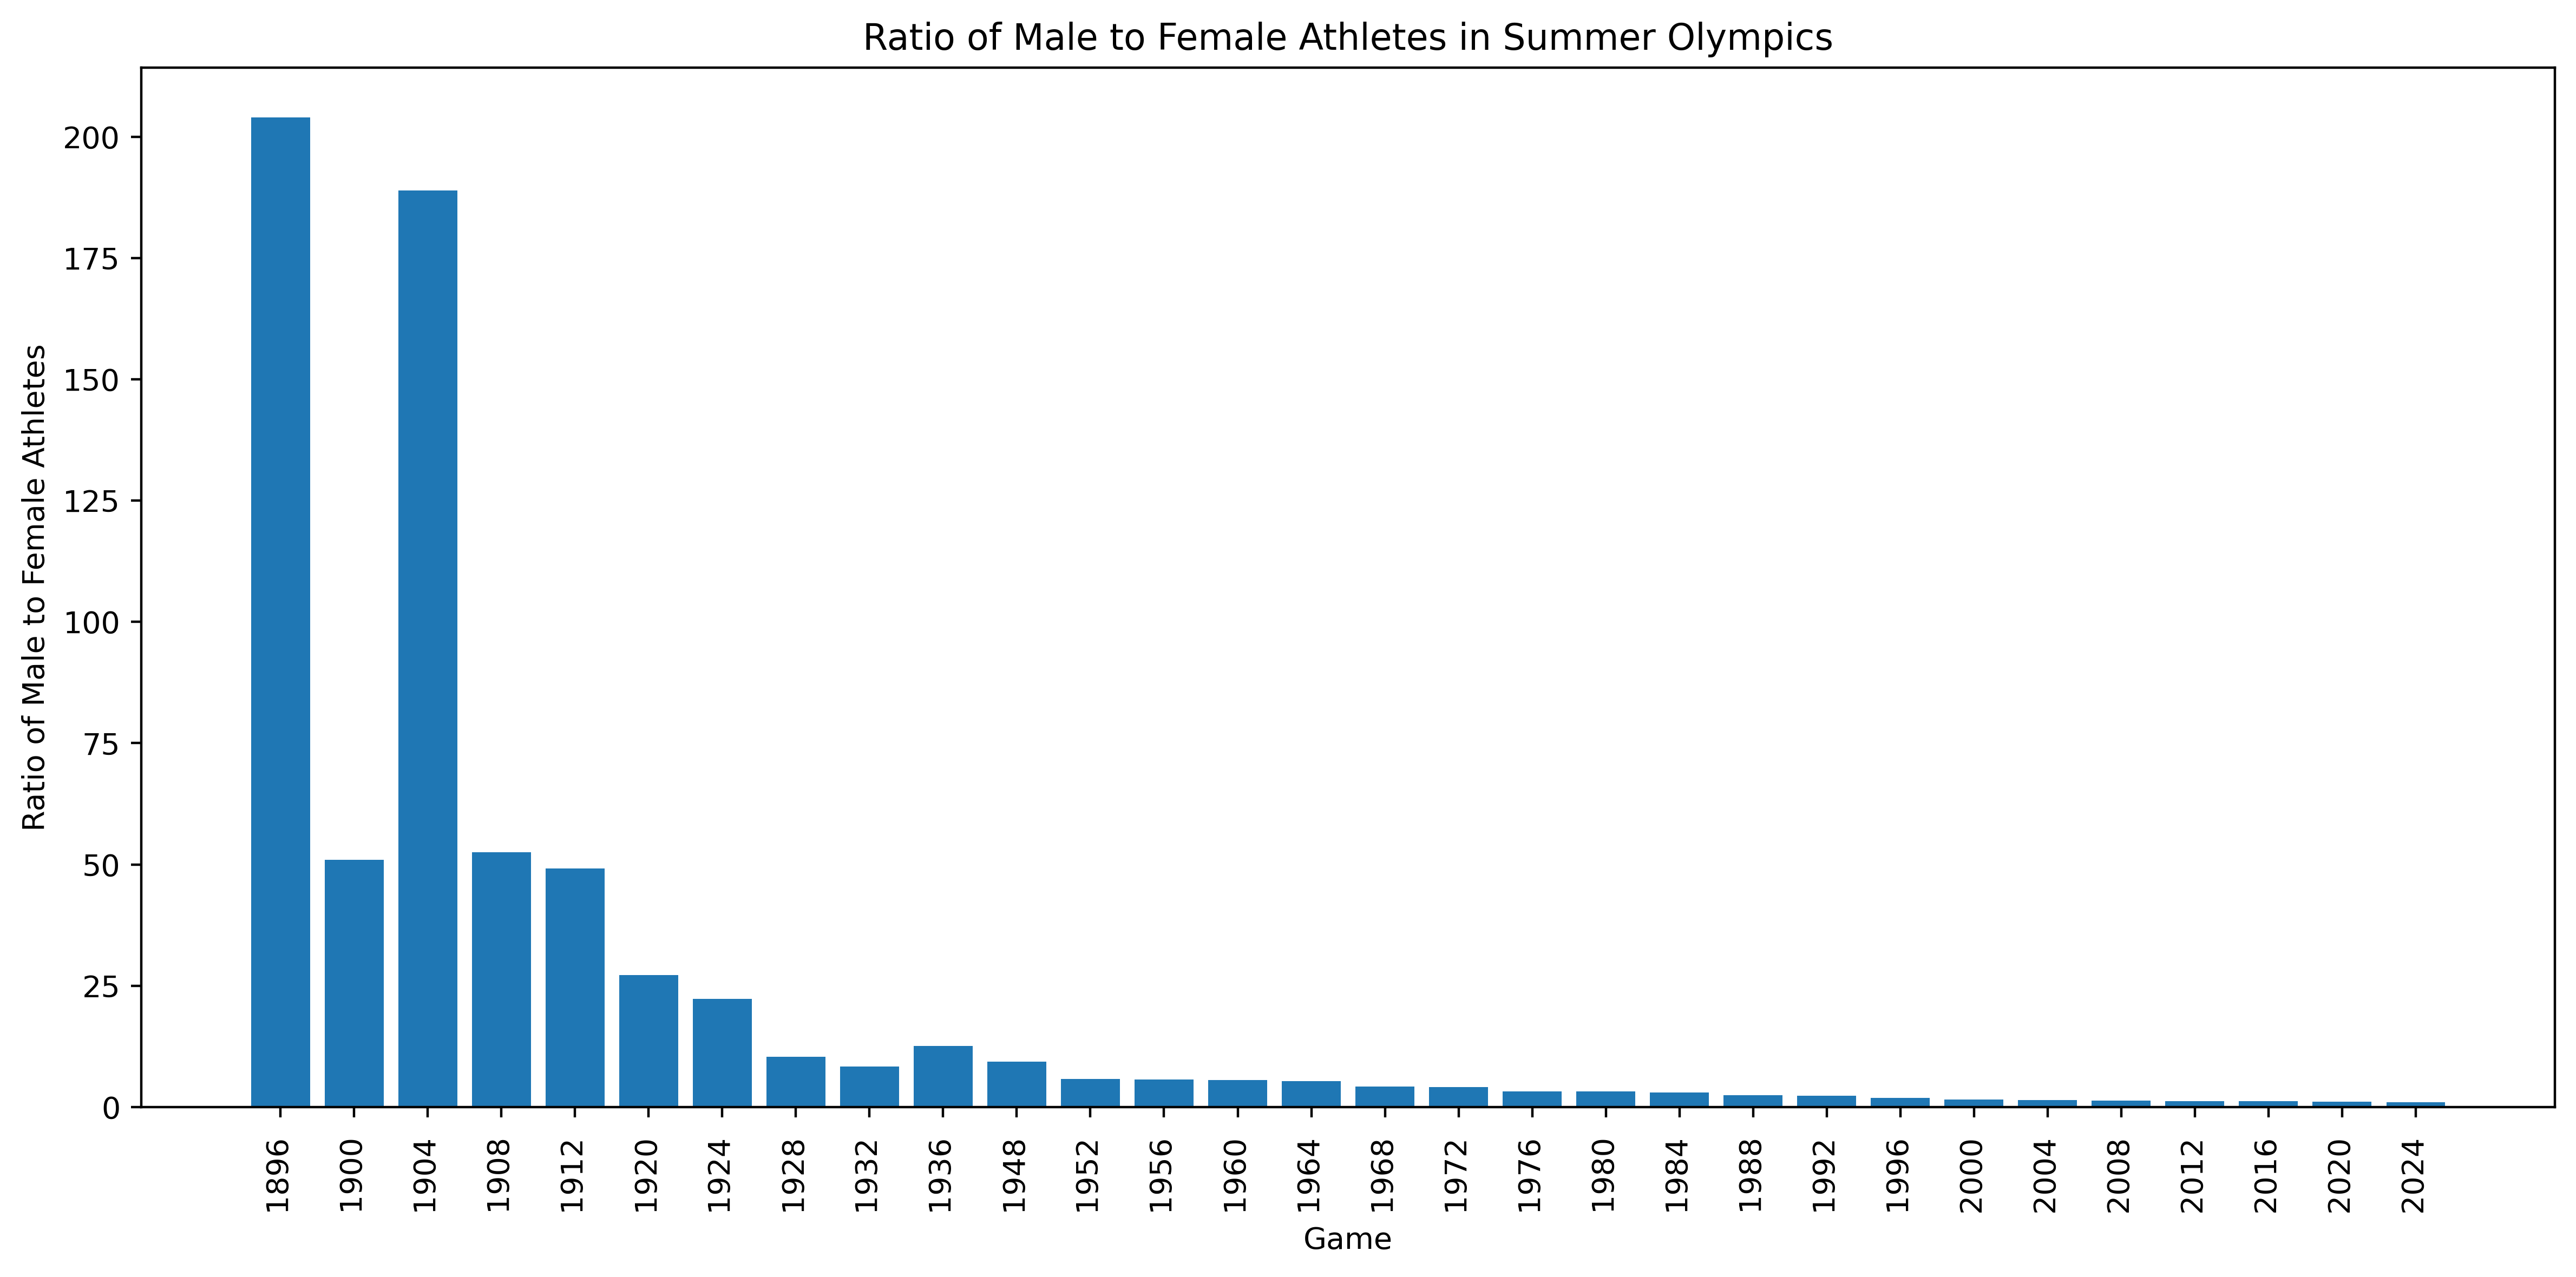

In [34]:
# Calculate the ratio of males to females for each game
gender_ratio = gender_game_counts['Male'] / gender_game_counts['Female']

# Create a bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.bar(gender_ratio.index.str.replace('Summer Olympics', ''), gender_ratio.values) #Remove 'Summer Olympics' from x-axis
plt.xlabel('Game')
plt.ylabel('Ratio of Male to Female Athletes')
plt.title('Ratio of Male to Female Athletes in Summer Olympics')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


This chart shows the ratio of males to females for each game, and the ratio has been going down over the years as you can see. Women first competed in the Olympics in 1900, during the Paris Games, where 22 women out of 997 total athletes participated in five sports: tennis, sailing, croquet, equestrianism, and golf. [14] However, their participation was limited, and many sporting events were still closed to women for decades. Women's inclusion was slow, particularly in sports perceived as demanding physical strength or endurance, such as track and field and swimming.

The 1896 Summer Olympics were held in Athens, Greece and did not officially allow female athletes to compete. The games were made for male competitors, it reflects broader societal norms of the time, which restricted female participation. The 2 women that did compete, were not official competitors which were Stamata Revithi (a Greek women who tried to compete in a marathon and denied entry, she completed the race unofficially) and Melpomene who also tried to run a marathon but was restricted. It wasn't until the 1900 Paris Olympics that women were allowed to compete in a limited number of events. [15]

In 2024, there was an equal amount of males to females, 5250 to 5250.




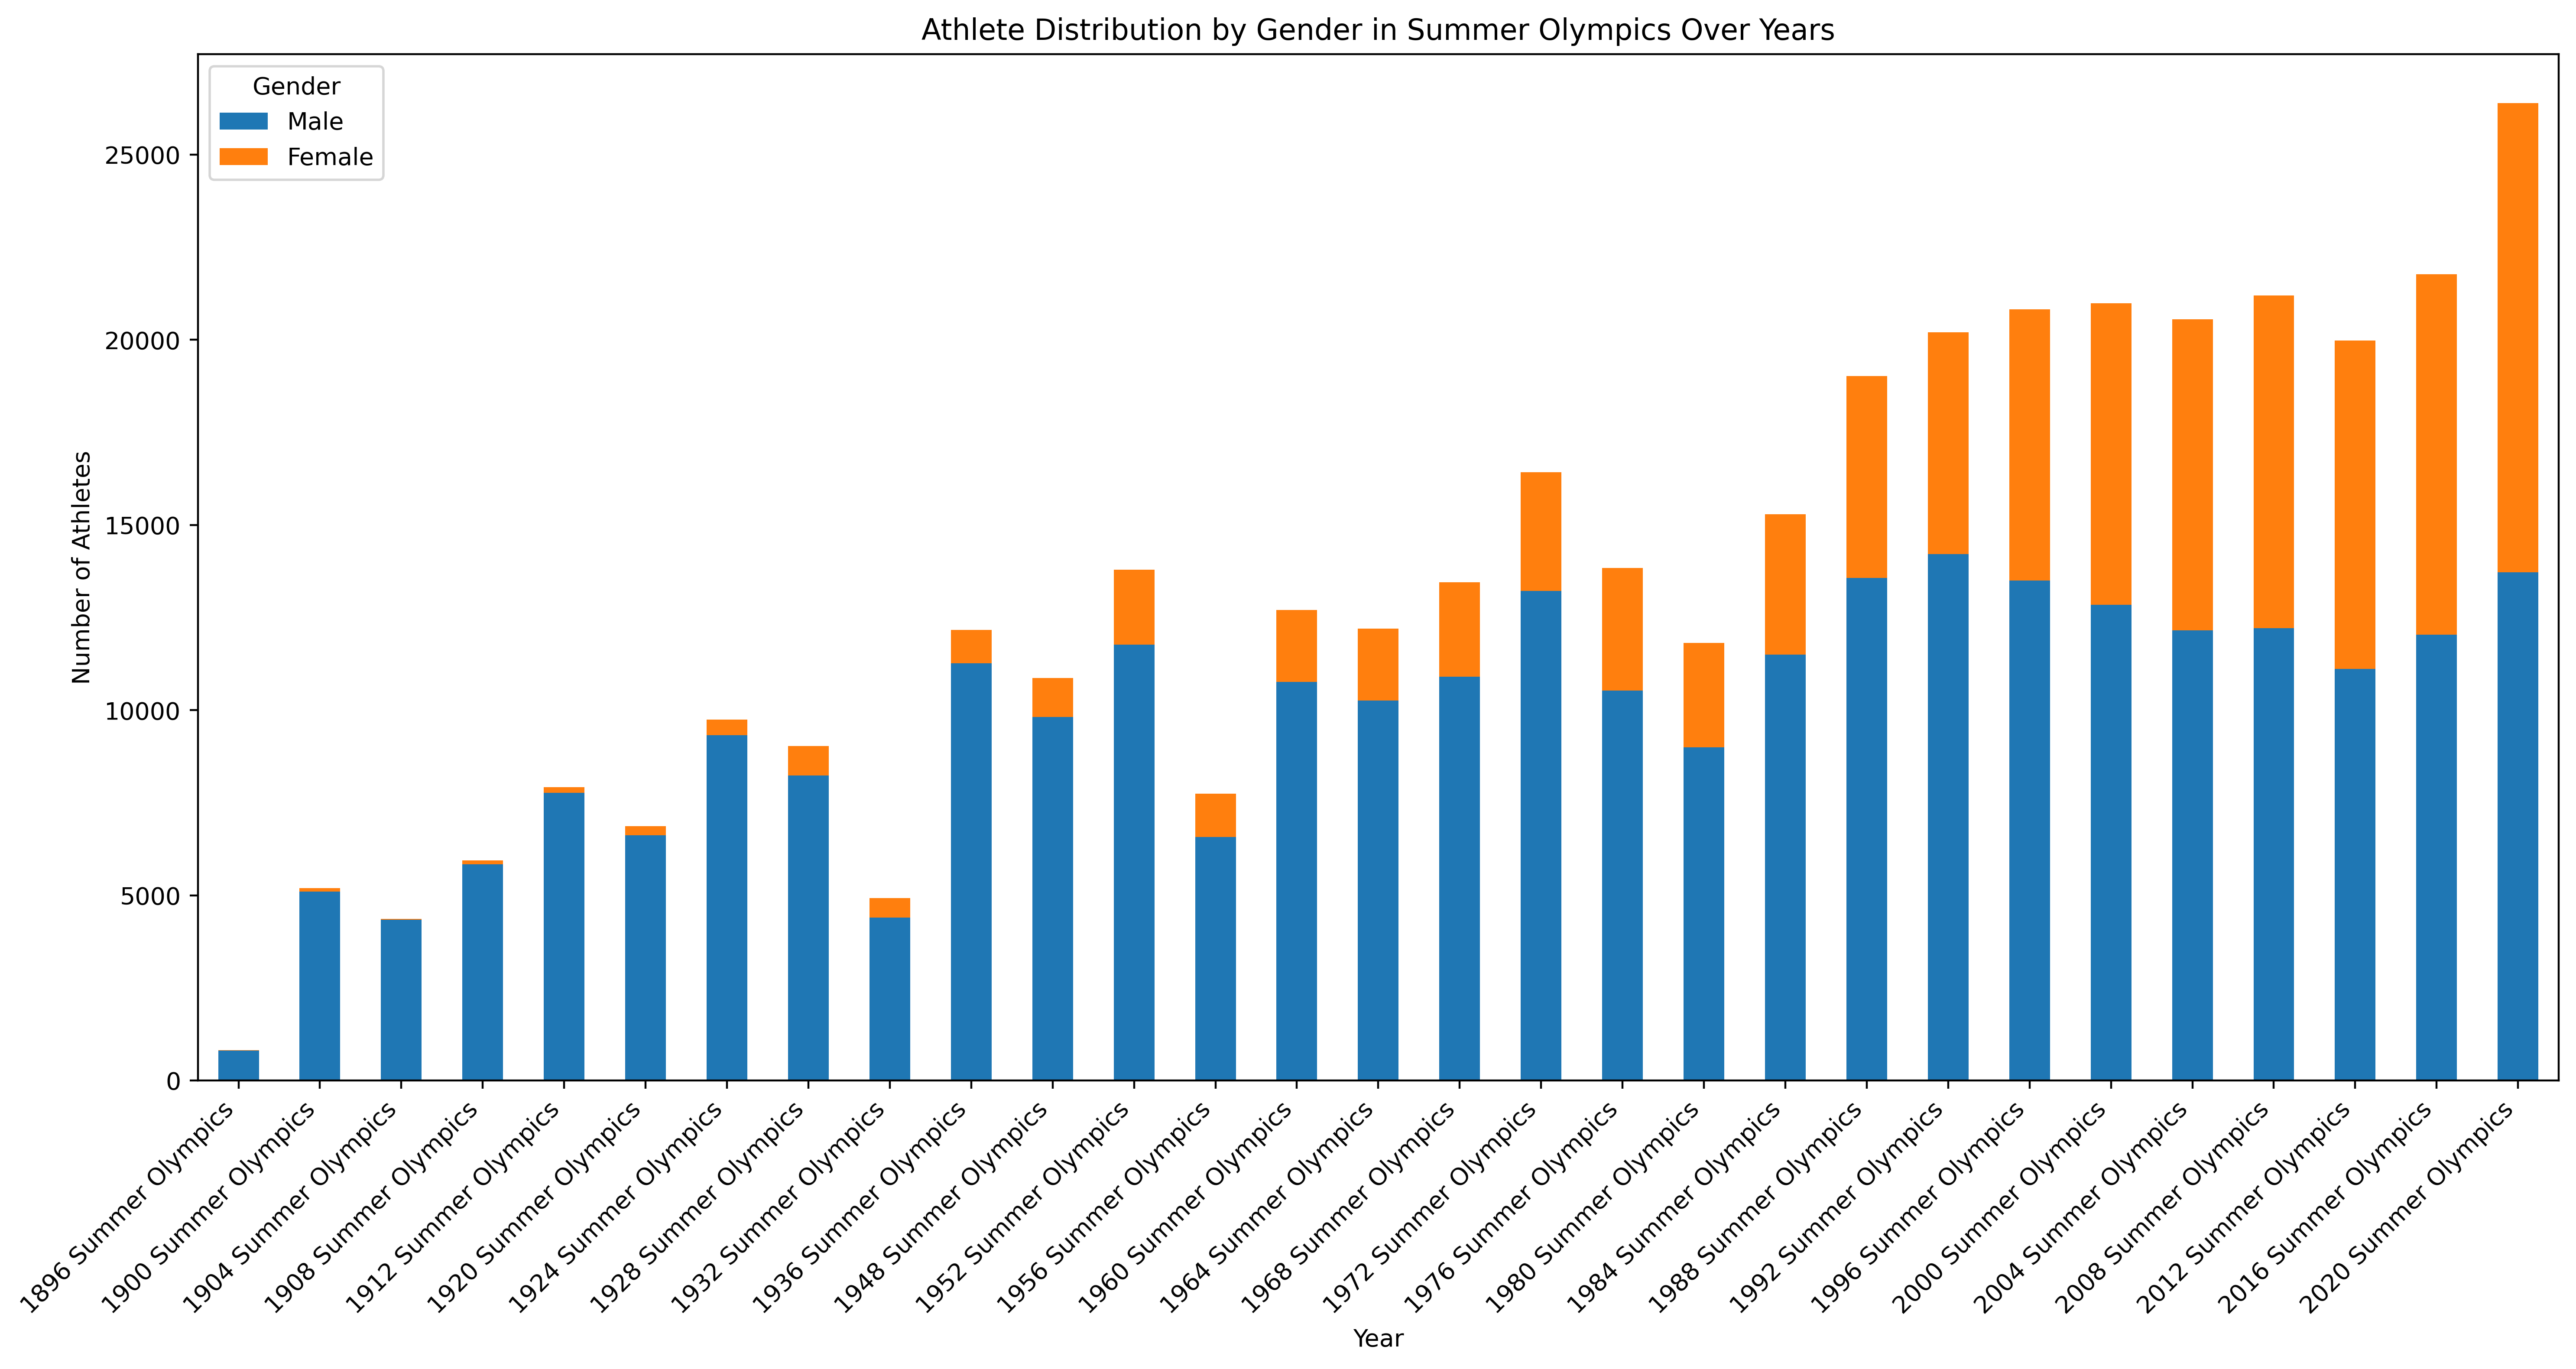

In [35]:
# Group by year and gender, and count the number of athletes

gender_year_counts = summer_df.groupby(['game', 'gender'])['id'].count().unstack()
# Calculate the total number of athletes for each year
gender_year_counts['Total'] = gender_year_counts['Male'] + gender_year_counts['Female']

# Calculate the percentage of male and female athletes for each year
gender_year_counts['Male Percentage'] = (gender_year_counts['Male'] / gender_year_counts['Total']) * 100
gender_year_counts['Female Percentage'] = (gender_year_counts['Female'] / gender_year_counts['Total']) * 100

# Create a stacked bar chart
ax = gender_year_counts[['Male', 'Female']].plot(kind='bar', stacked=True, figsize=(15, 8))

# Customize the chart
plt.title('Athlete Distribution by Gender in Summer Olympics Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Gender')

# Show the chart
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


This graph shows the split between Males and Females in Summer Olympics over the years. Explanations are provided in previous captions about historical trends.

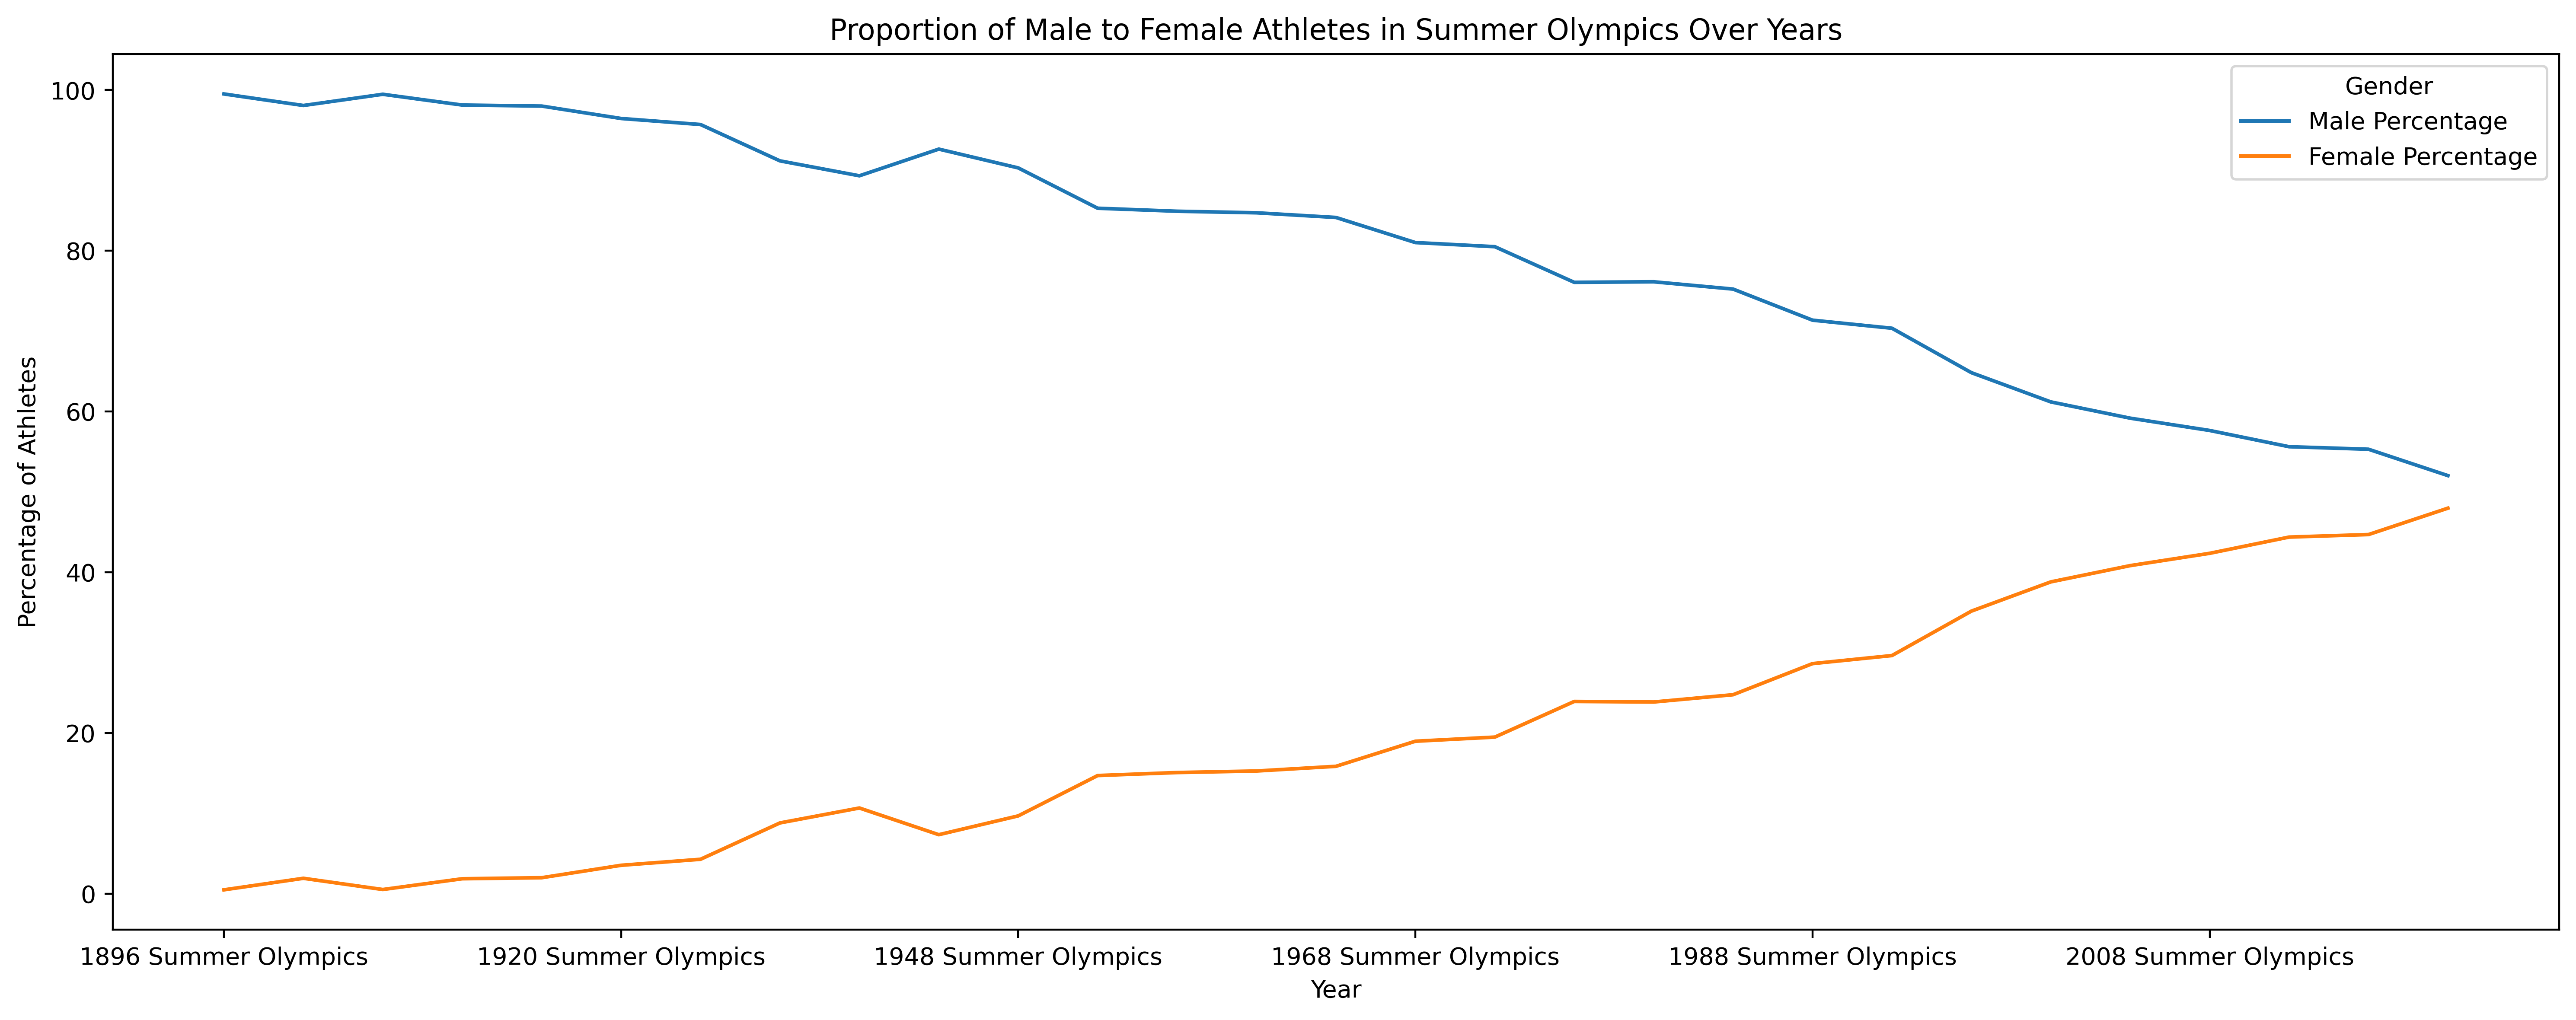

In [36]:
# Group by year and gender, and count the number of athletes
gender_year_counts = summer_df.groupby(['game', 'gender'])['id'].count().unstack()

# Calculate the total number of athletes for each year
gender_year_counts['Total'] = gender_year_counts['Male'] + gender_year_counts['Female']

# Calculate the percentage of male and female athletes for each year
gender_year_counts['Male Percentage'] = (gender_year_counts['Male'] / gender_year_counts['Total']) * 100
gender_year_counts['Female Percentage'] = (gender_year_counts['Female'] / gender_year_counts['Total']) * 100

# Create a line chart for percentage change
ax2 = gender_year_counts[['Male Percentage', 'Female Percentage']].plot(kind='line', figsize=(15, 6))
plt.title('Proportion of Male to Female Athletes in Summer Olympics Over Years')
plt.xlabel('Year')
plt.ylabel('Percentage of Athletes')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

This graph shows a trend that the percentage of Male to Female is getting closer to 50/50 over time and in Paris 2024 they did reach this value. This is showing for Summer Olympics.

### Data Preprocessing Part 2

In [37]:
winter_df = athlete_df[athlete_df['game'].str.contains('Winter')]

In [38]:
winter_df.head()

,id,gender,team,game,noc,sport,event,medal
14,127874,Female,Germany,2014 Winter Olympics,GER,Speed Skating (Skating),"Speed Skating (Skating), 500 metres, Women(Oly...",None
15,127874,Female,Germany,2014 Winter Olympics,GER,Speed Skating (Skating),"Speed Skating (Skating), 500 metres, Women(Oly...",None
22,101764,Female,Republic of Korea,2002 Winter Olympics,KOR,Short Track Speed Skating (Skating),"Short Track Speed Skating (Skating), 3,000 met...",Gold
23,101764,Female,Republic of Korea,2002 Winter Olympics,KOR,Short Track Speed Skating (Skating),"Short Track Speed Skating (Skating), 3,000 met...",Gold
32,87516,Male,Hungary,1936 Winter Olympics,HUN,Ice Hockey (Ice Hockey),"Ice Hockey (Ice Hockey), Ice Hockey, Men(Olympic)",None


In [40]:
# Fill NaN values with None in winter_df
winter_df = winter_df.fillna("None")
print(winter_df.head())

        id  gender               team                  game  noc  \
14  127874  Female            Germany  2014 Winter Olympics  GER   
15  127874  Female            Germany  2014 Winter Olympics  GER   
22  101764  Female  Republic of Korea  2002 Winter Olympics  KOR   
23  101764  Female  Republic of Korea  2002 Winter Olympics  KOR   
32   87516    Male            Hungary  1936 Winter Olympics  HUN   

                                  sport  \
14              Speed Skating (Skating)   
15              Speed Skating (Skating)   
22  Short Track Speed Skating (Skating)   
23  Short Track Speed Skating (Skating)   
32              Ice Hockey (Ice Hockey)   

                                                event medal  
14  Speed Skating (Skating), 500 metres, Women(Oly...  None  
15  Speed Skating (Skating), 500 metres, Women(Oly...  None  
22  Short Track Speed Skating (Skating), 3,000 met...  Gold  
23  Short Track Speed Skating (Skating), 3,000 met...  Gold  
32  Ice Hockey (Ice Ho

In [41]:
print(winter_df.dtypes)

id         int64
gender    object
team      object
game      object
noc       object
sport     object
event     object
medal     object
dtype: object


In [42]:
# Remove rows containing "Youth Olympics"
gender_game_counts = gender_game_counts[~gender_game_counts.index.str.contains("Youth Olympics")]

print(gender_game_counts)

                      Female   Male
game                               
1896 Summer Olympics       4    816
1900 Summer Olympics     100   5101
1904 Summer Olympics      23   4346
1908 Summer Olympics     111   5835
1912 Summer Olympics     158   7765
1920 Summer Olympics     243   6620
1924 Summer Olympics     418   9326
1928 Summer Olympics     796   8237
1932 Summer Olympics     526   4404
1936 Summer Olympics     894  11272
1948 Summer Olympics    1053   9816
1952 Summer Olympics    2029  11767
1956 Summer Olympics    1168   6577
1960 Summer Olympics    1941  10768
1964 Summer Olympics    1934  10264
1968 Summer Olympics    2553  10900
1972 Summer Olympics    3200  13219
1976 Summer Olympics    3311  10528
1980 Summer Olympics    2819   8997
1984 Summer Olympics    3787  11505
1988 Summer Olympics    5445  13571
1992 Summer Olympics    5987  14214
1996 Summer Olympics    7323  13502
2000 Summer Olympics    8142  12841
2004 Summer Olympics    8391  12161
2008 Summer Olympics    8978

### Exploratory Data Analysis Part 2

C:\Users\gurmo\AppData\Local\Temp\ipykernel_20628\2444139703.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter_df_no_youth['Year'] = winter_df_no_youth['game'].str.extract(r'(\d{4})')


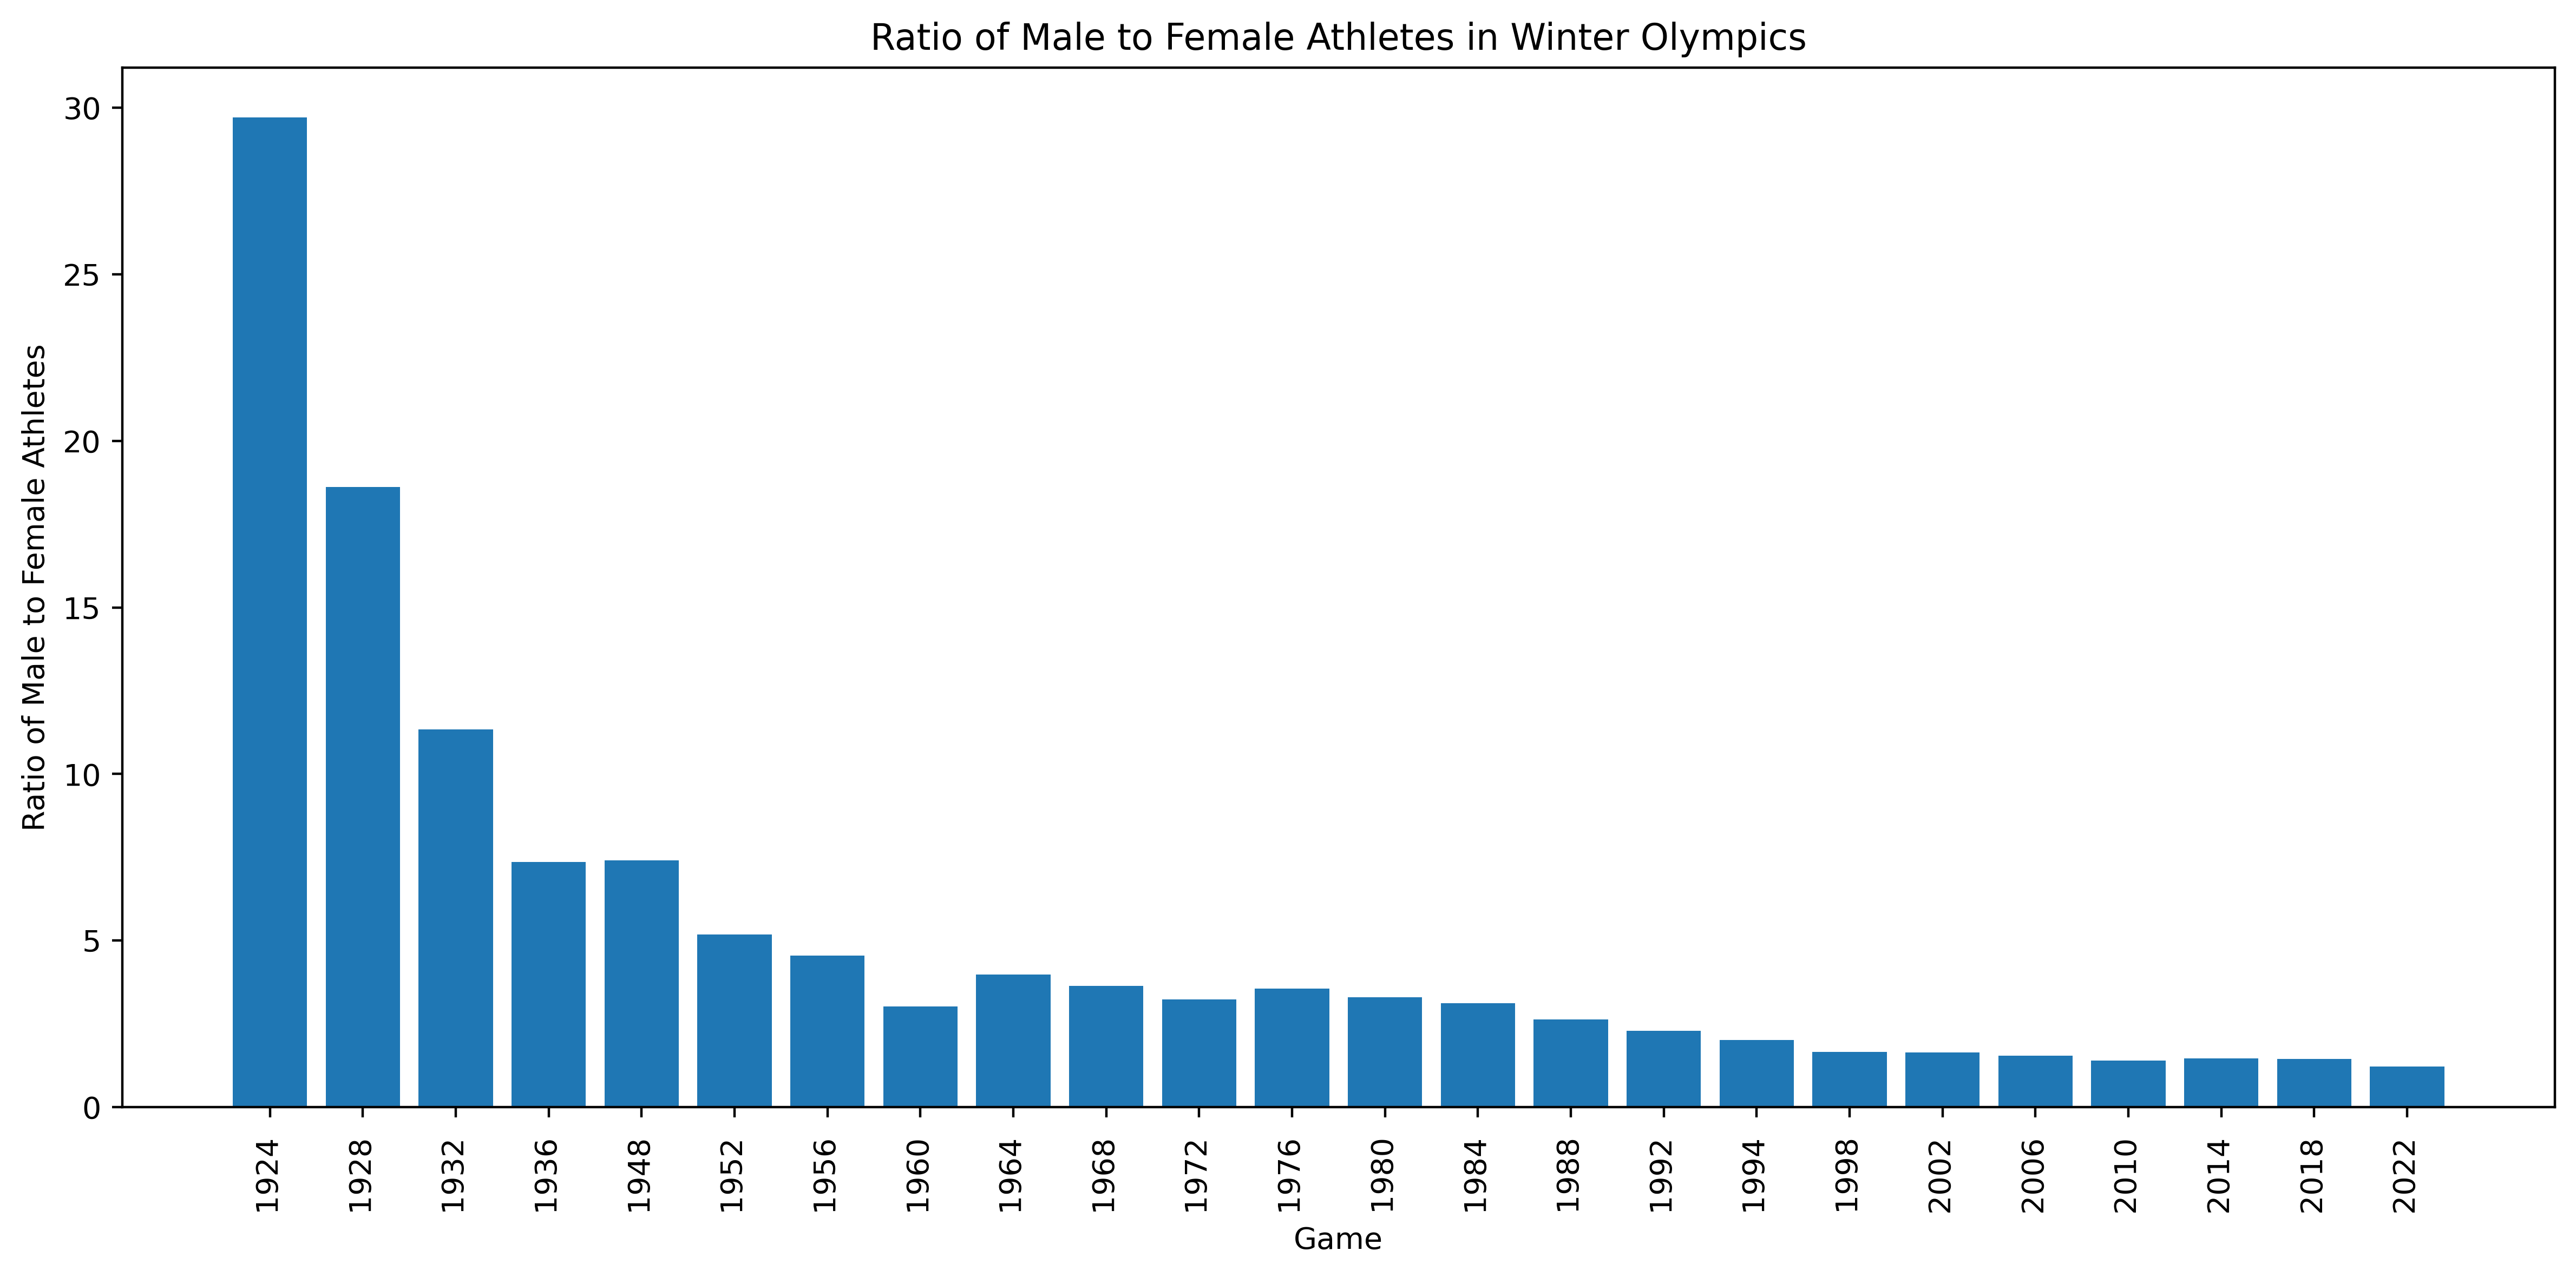

In [43]:
# Remove rows containing "Youth" in the 'game' column
winter_df_no_youth = winter_df[~winter_df['game'].str.contains('Youth')]

# Extract the year from the 'game' column
winter_df_no_youth['Year'] = winter_df_no_youth['game'].str.extract(r'(\d{4})')

gender_game_counts_winter = winter_df_no_youth.groupby(['game', 'gender'])['gender'].count().unstack()
# Calculate the ratio of males to females for each game
gender_ratio_winter = gender_game_counts_winter['Male'] / gender_game_counts_winter['Female']


# Create a bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.bar(gender_ratio_winter.index.str.replace('Winter Olympics', ''), gender_ratio_winter.values) #Remove 'Summer Olympics' from x-axis
plt.xlabel('Game')
plt.ylabel('Ratio of Male to Female Athletes')
plt.title('Ratio of Male to Female Athletes in Winter Olympics')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

For Winter Olympics, the women participation has been increasing over the years. For the most recent year which was in 2022, there is a ratio of 1.3 Males to Females.

In 1960s, more women started participated because gender roles were shifting after the war and there was more flexibility for them to participate in skiing and figure skating.

C:\Users\gurmo\AppData\Local\Temp\ipykernel_20628\1220206343.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter_df_no_youth['Year'] = winter_df_no_youth['game'].str.extract(r'(\d{4})')


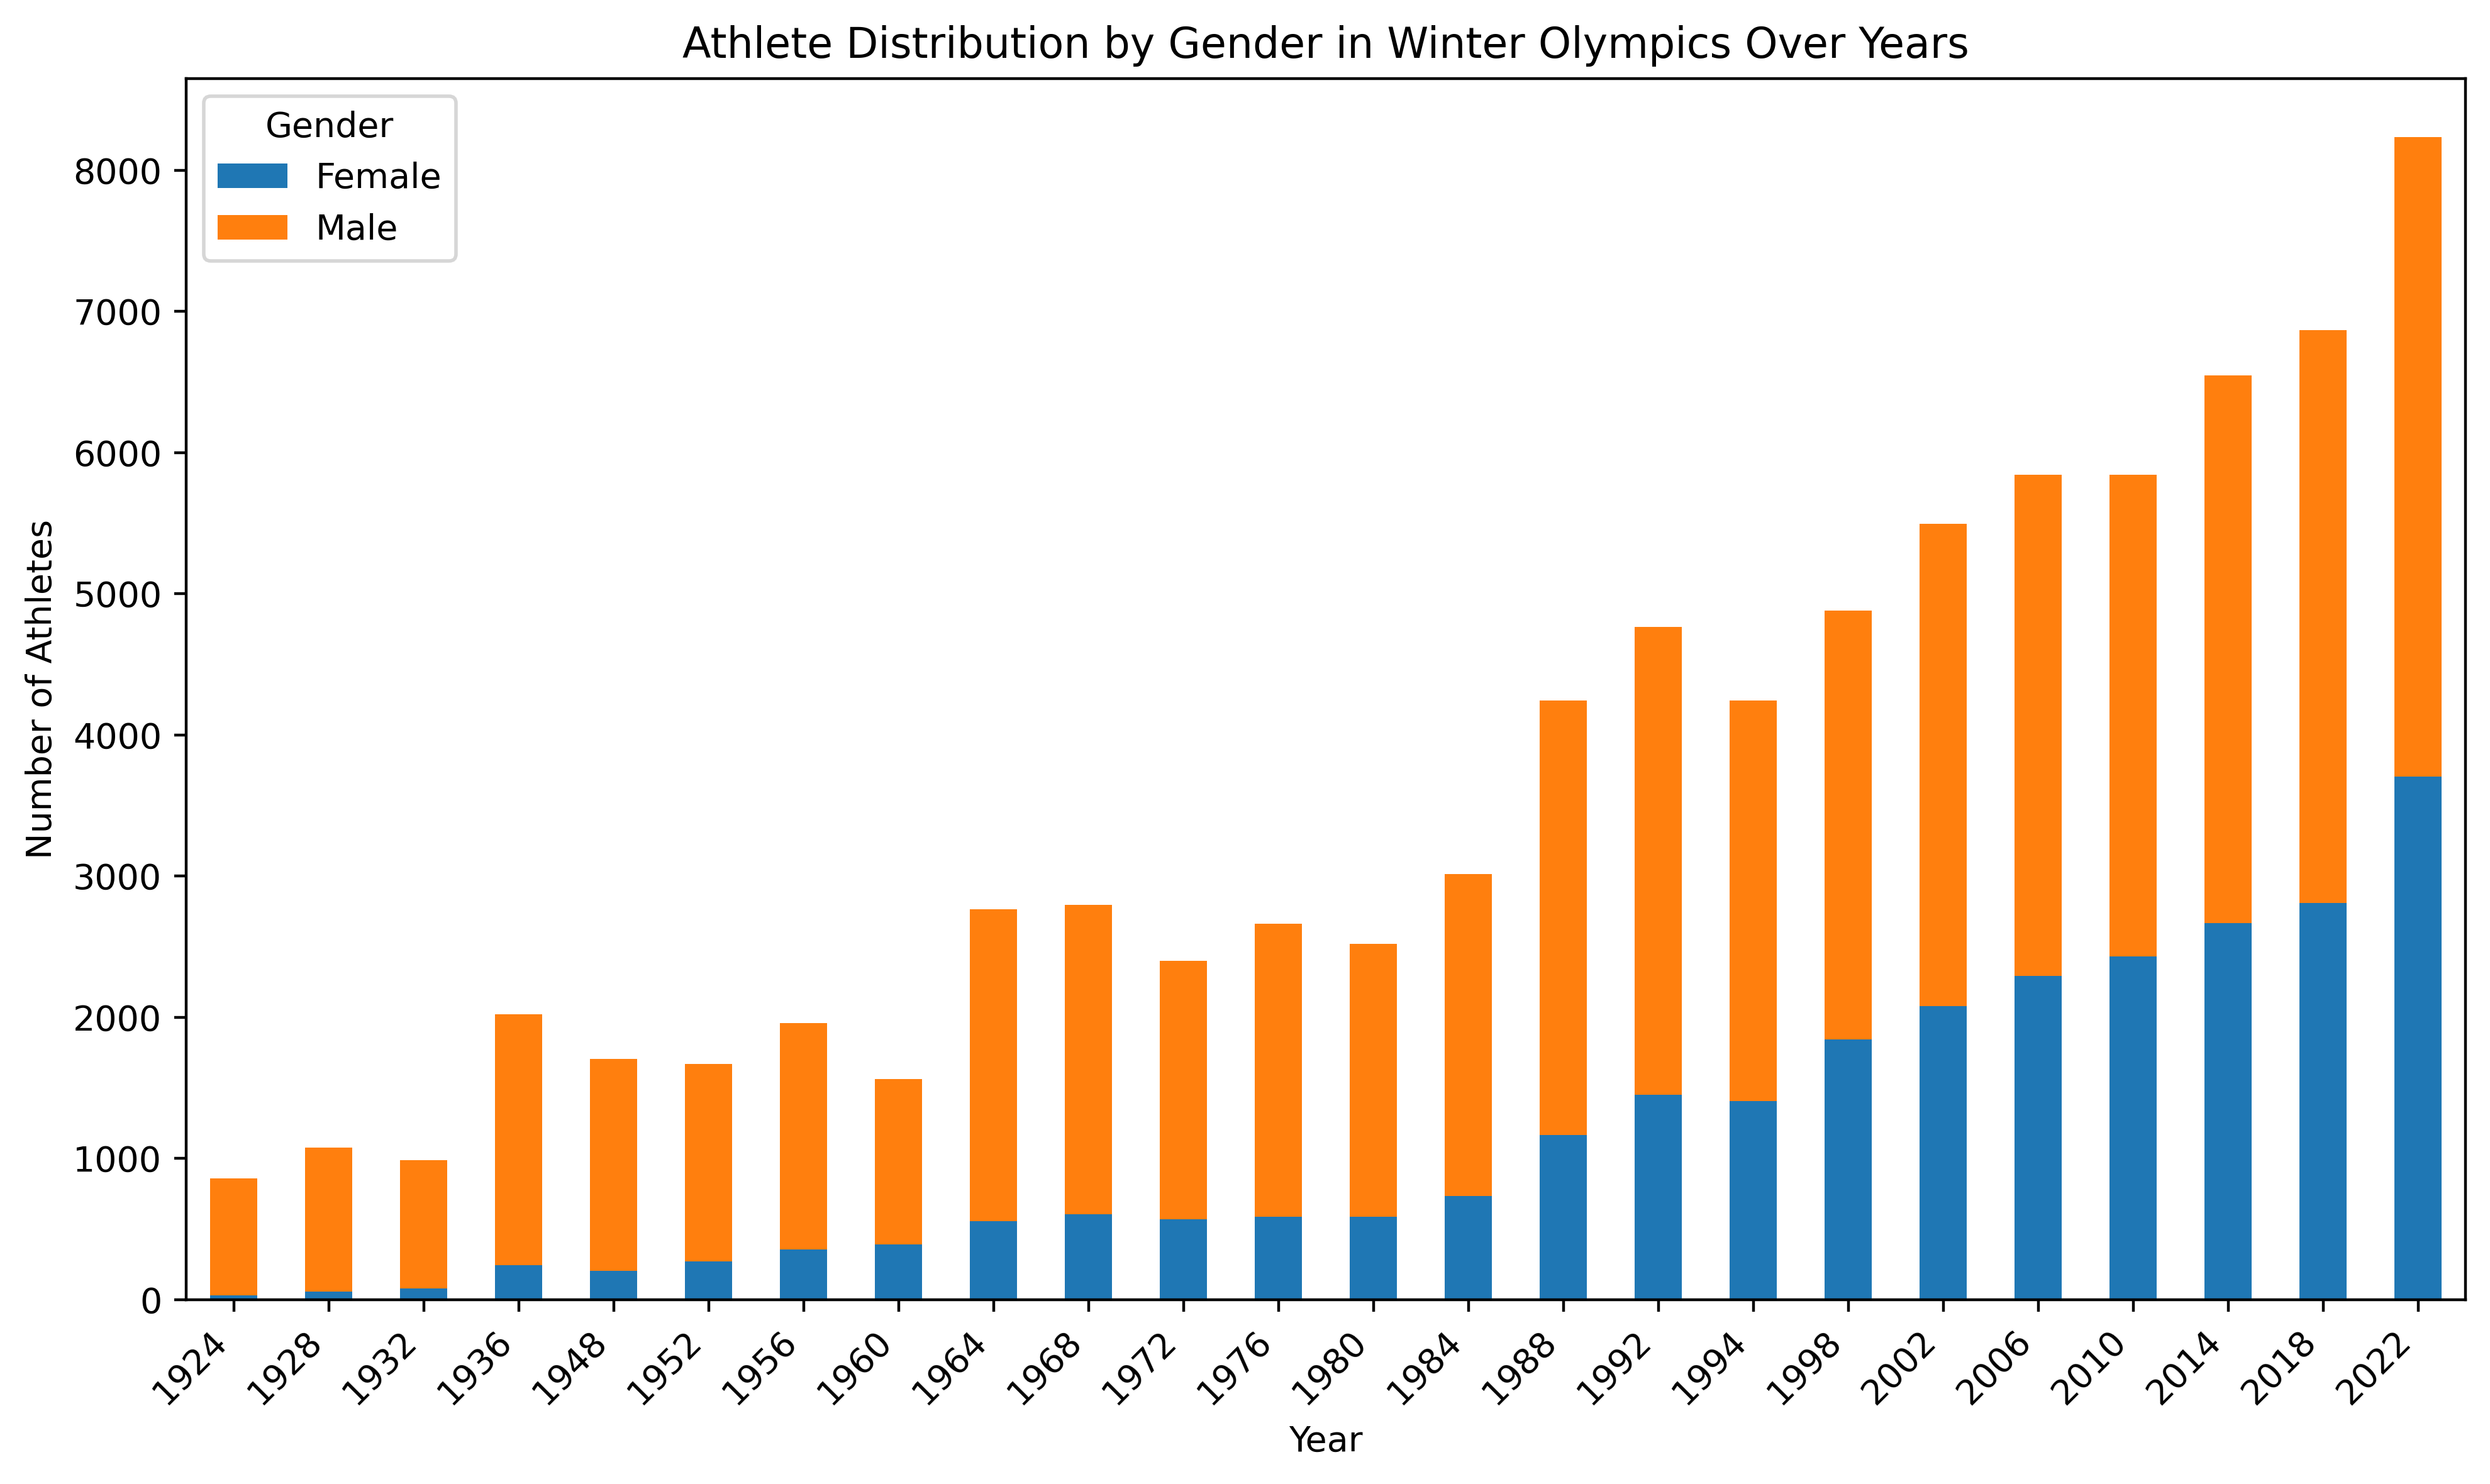

In [44]:
# Remove rows containing "Youth" in the 'game' column
winter_df_no_youth = winter_df[~winter_df['game'].str.contains('Youth')]

# Extract the year from the 'game' column
winter_df_no_youth['Year'] = winter_df_no_youth['game'].str.extract(r'(\d{4})')

# Group by year and gender, and count the number of athletes
gender_year_counts = winter_df_no_youth.groupby(['Year', 'gender'])['id'].count().unstack()

# Create a stacked bar chart
ax = gender_year_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the chart
plt.title('Athlete Distribution by Gender in Winter Olympics Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Gender')

# Show the chart
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()



In 1932, the Winter Olympics were held in Lake Placid, USA. This led to increased opportunities for female athletes. Women competed in figure skating which was introduced in 1908 Summer Olympics and other events. Skiing also had an increased trend of women participating.

In the 1956 Winter Olympics in Italy, social roles of women began to shift after World War II, again more skiing had women in it and national strength of a country was more effectively displayed when gender equality was showcased promoting female athletes. There was media influence which gave more visibility to female athletes and popularized women's participation in sports. [16] [17]



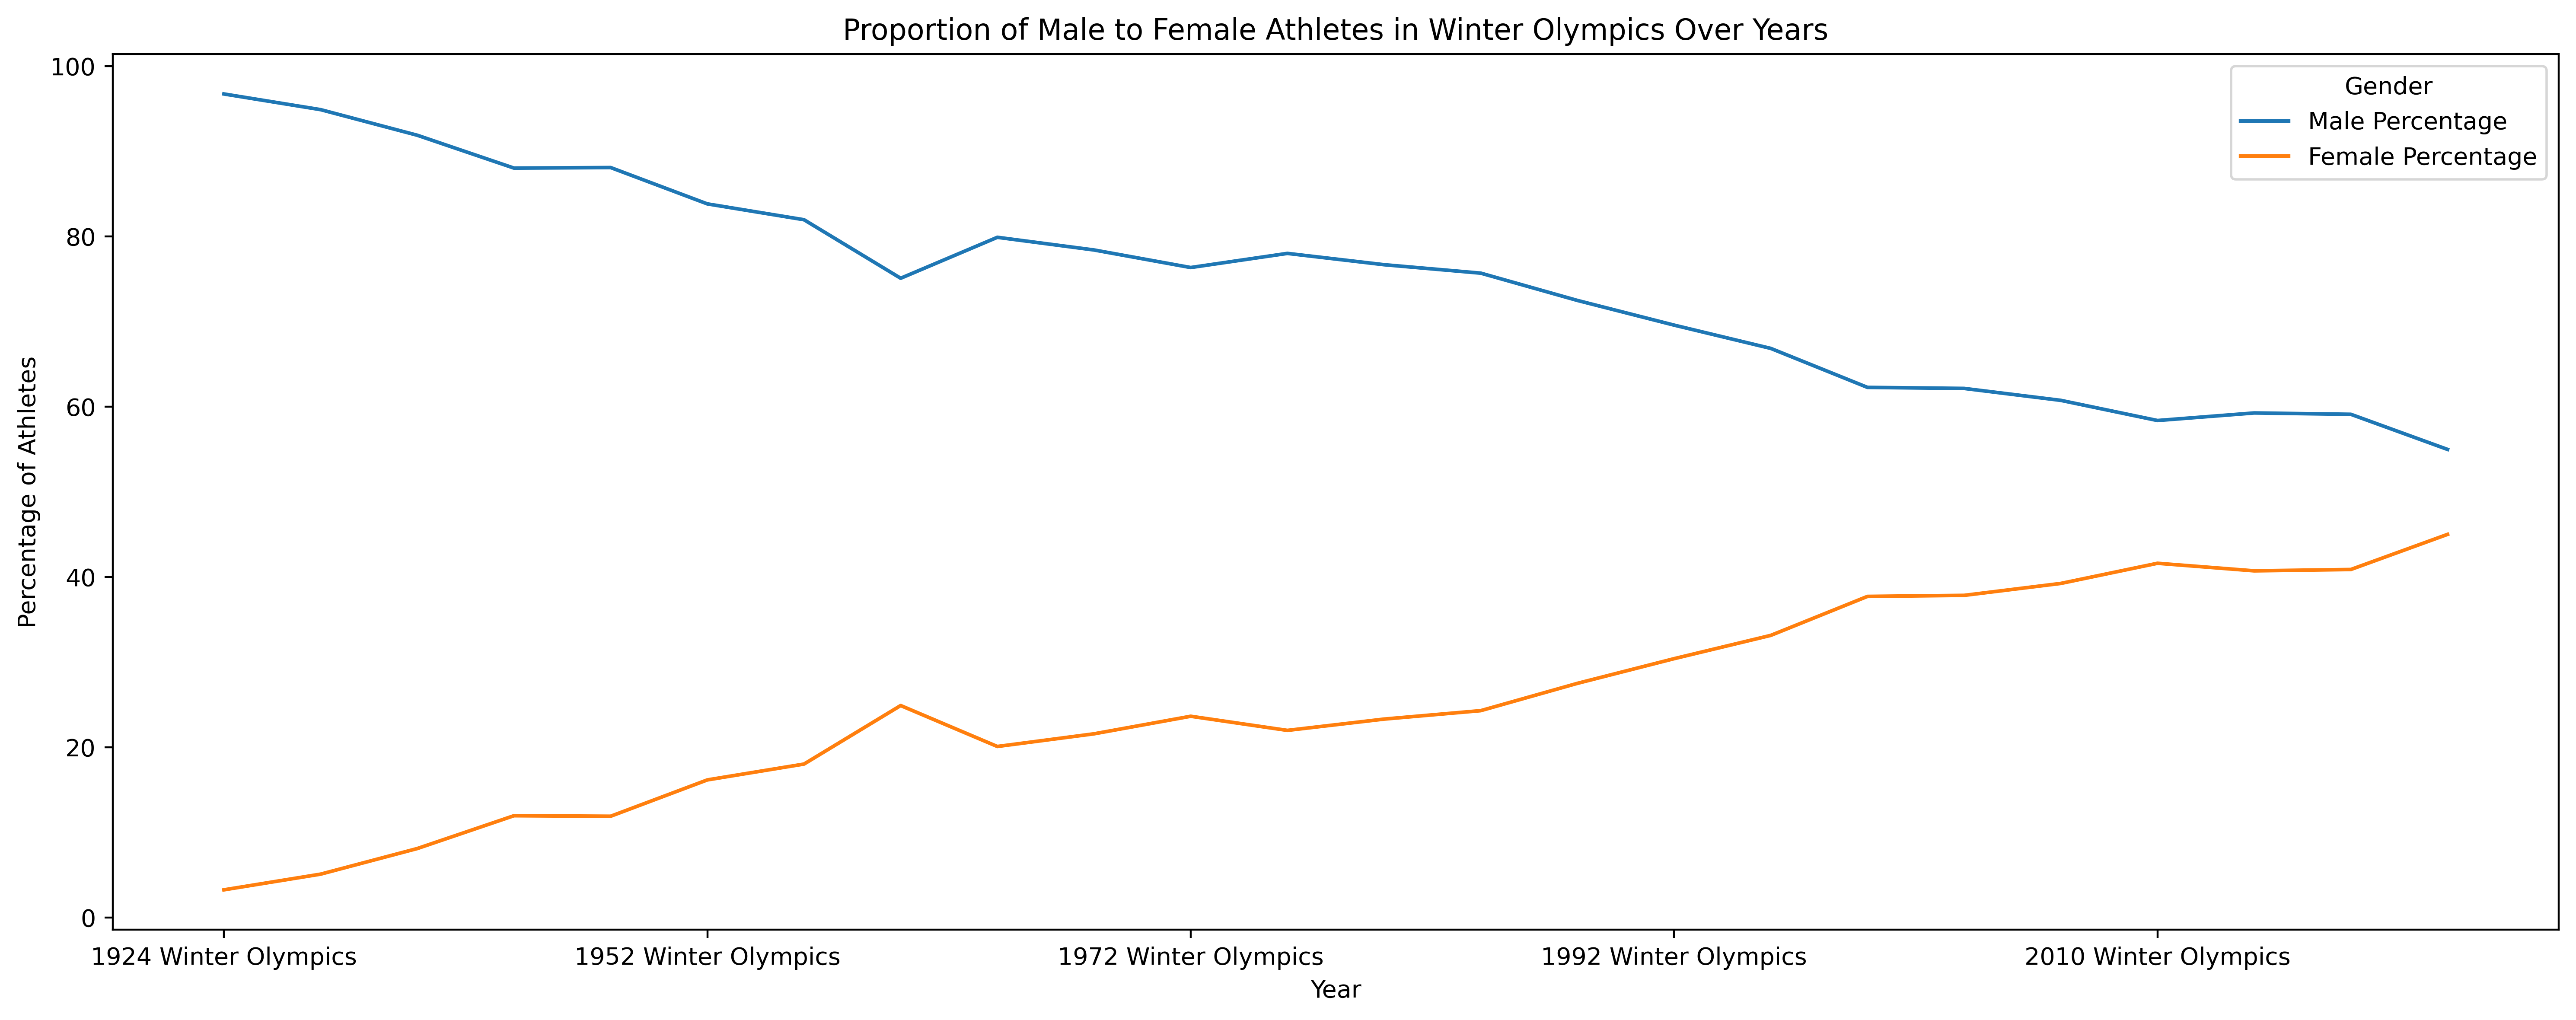

In [45]:
# Group by year and gender, and count the number of athletes
gender_year_counts = winter_df_no_youth.groupby(['game', 'gender'])['id'].count().unstack()

# Calculate the total number of athletes for each year
gender_year_counts['Total'] = gender_year_counts['Male'] + gender_year_counts['Female']

# Calculate the percentage of male and female athletes for each year
gender_year_counts['Male Percentage'] = (gender_year_counts['Male'] / gender_year_counts['Total']) * 100
gender_year_counts['Female Percentage'] = (gender_year_counts['Female'] / gender_year_counts['Total']) * 100

# Create a line chart for percentage change
ax2 = gender_year_counts[['Male Percentage', 'Female Percentage']].plot(kind='line', figsize=(15, 6))
plt.title('Proportion of Male to Female Athletes in Winter Olympics Over Years')
plt.xlabel('Year')
plt.ylabel('Percentage of Athletes')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

This graph shows a trend that the percentage of Male to Female is getting closer to 50/50 over time for the Winter Olympics.

### Objective 2 Summary

In the investigation of guiding question 2, we looked at the ratio of men and women participating over the years in the Summer and Winter Olympics. We saw that in both seasons, the overall trend was moving to an equal amount of men and women participating. For the Winter Olympics, women started to participate in Figure Skating and Skiing early on as compared to Summer Olympics where they unofficially participated in running events. There may have been an underrepresentation of women in the start of the 1900s but in recent years this has been addressed and there is much more gender inclusion. Changing political trends and social norms have allowed countries to admit more women and demonstrate their national strength.

## Objective 3

The third objective of this project will be to **assess whether a country has an advantage in receiving more medals if it hosts the Olympics**. This analysis will pave the way to determine what factors contribute to receiving more or less medals for the country if it hosts the Olympics.

In [ ]:
hosts_df = pd.read_csv('../data/raw/host_cities_raw.csv')
noc_df = pd.read_csv('../data/raw/noc_countries_raw.csv')
pd.set_option('display.max_rows', None) # print the full dfs with scrolling view
pd.set_option('display.min_rows', None)

hosts_df.head(len(hosts_df))

### Supplementary Data Collection

We would like to know the host country, but our dataset only includes the host city. Fortunately wikipedia has a similar helpful table which is directly readable by pandas [18]:

In [ ]:
host_countries_df = pd.read_html('https://en.wikipedia.org/wiki/List_of_Olympic_Games_host_cities')[0] # the first table on the page
host_countries_df.head()

### Data Preprocessing

In [ ]:
# firstly, drop the rows for any year the Games were cancelled due to a world war [19]:
# https://en.wikipedia.org/wiki/Category:Cancelled_Olympic_Games
cancelled_years = [1916, 1940, 1944]
for cancelled_year in cancelled_years:
    hosts_df.drop(hosts_df[(hosts_df['year'] == cancelled_year)].index, inplace=True)
host_countries_df = host_countries_df[host_countries_df['Opening ceremony'].str.contains('Cancelled') == False]

# and any years in the future:
hosts_df = hosts_df[hosts_df['year'] <= 2024]
host_countries_df = host_countries_df[host_countries_df['Year'] <= 2024]

# now the two tables have the same length
assert len(hosts_df) == len(host_countries_df)
# print(len(hosts_df)) # 54, the correct number of modern games

hosts_df.sort_values(by=['year', 'season'], ascending=[True, False], inplace=True) # since summer < winter alphabetically, this sorts to chronological order
hosts_df.reset_index(inplace=True, drop=True)
host_countries_df.reset_index(inplace=True, drop=True) # these are already in chronological order

# and can be concatenated
hosts_df = pd.concat([hosts_df, host_countries_df], axis=1)

# drop the columns not relevant to analysis
keep_cols = ['year', 'season', 'City.1', 'Country', 'Region']
hosts_df = hosts_df[keep_cols]
hosts_df.head()

In [ ]:
# remove the citations in square brackets 
for i in range(len(hosts_df)):
    if '[' in hosts_df.loc[i, 'City.1']:
        hosts_df.loc[i, 'City.1'] = hosts_df.loc[i, 'City.1'].split('[')[0]
    if '[' in hosts_df.loc[i, 'Country']:
        hosts_df.loc[i, 'Country'] = hosts_df.loc[i, 'Country'].split('[')[0]

# row i=19 in 1956 includes the Summer Games in Melbourne but also the Equestrian Games in Stockholm which should be removed
hosts_df.loc[19, 'City.1'] = hosts_df.loc[19, 'City.1'].split()[0]
hosts_df.loc[19, 'Country'] = hosts_df.loc[19, 'Country'].split()[0]
hosts_df.loc[19, 'Region'] = hosts_df.loc[19, 'Region'].split()[0]

# finally rename the columns to a consistent format
hosts_df.rename(columns={'City.1': 'city', 'Country':'country', 'Region':'region'}, inplace=True)

# merge with the noc country codes
noc_df.replace('Great Britain', 'United Kingdom', inplace=True)
noc_df.replace("People's Republic of China", 'China', inplace=True)
noc_df.replace('Republic of Korea', 'South Korea', inplace=True)
noc_df.replace('Russian Federation', 'Russia', inplace=True)
hosts_df = pd.merge(hosts_df, noc_df, how='left', on='country')
hosts_df.head()

In [ ]:
# save the cleaned dataset
hosts_df.to_csv('host_countries.csv', index=False)
hosts_df.head()

### Data Visualization

In [ ]:
# which countries have hosted the most games?
unique_host_countries = hosts_df['noc'].unique()
unique_host_regions = hosts_df['region'].unique()

unique_country_code = hosts_df['noc'].unique()
color_code = [
    "#FF6633", "#FFB399", "#FF33FF", "#FFFF99", "#00B3E6", 
    "#E6B333", "#3366E6", "#999966", "#99FF99", "#B34D4D", 
    "#80B300", "#809900", "#E6B3B3", "#6680B3", "#66991A", 
    "#FF99E6", "#CCFF1A", "#FF1A66", "#E6331A", "#33FFCC", 
    "#66994D", "#B366CC", "#4D8000", "#B33300", "#CC80CC", 
    "#66664D", "#991AFF", "#E666FF", "#4DB3FF", "#1AB399", 
    "#E666B3", "#33991A", "#CC9999", "#B3B31A", "#00E680", 
    "#4D8066", "#809980", "#E6FF80", "#1AFF33", "#999933", 
    "#FF3380", "#CCCC00", "#66E64D", "#4D80CC", "#9900B3", 
    "#E64D66", "#4DB380", "#FF4D4D", "#99E6E6", "#6666FF",
    "#003366", "#663399", "#FF6666", "#66CCFF", "#669999",
    "#FF9966", "#66FF33", "#CC3333", "#FFCC00", "#336666",
    "#33CCCC", "#99CC33", "#FF66CC", "#99CCCC", "#996699",
    "#FF99CC", "#CCCC99", "#9999CC", "#33CC66", "#FF6666",
    "#3366FF", "#9999FF", "#666633", "#CC9966", "#663333",
    "#3399FF", "#FF9966", "#FF6699", "#33FF99", "#6699FF",
    "#9966FF", "#FF9966", "#669933", "#99FF66", "#33FFCC",
    "#9933FF", "#99FFCC", "#33CCFF", "#9966CC", "#FF9933",
    "#66FF99", "#FFCC99", "#99CCFF", "#996633"
]
color_dict = {}
for index,code in enumerate (unique_country_code):
    color_dict[code] = color_code[index]


plot_df = pd.DataFrame()
region_plot_df = pd.DataFrame()

noc_df.set_index('country', drop=True, inplace=True)
for host in unique_host_countries:
    plot_df.loc[host, 'Olympics Hosted'] = len(hosts_df[hosts_df['noc'] == host]) 

for host in unique_host_regions:
    region_plot_df.loc[host, 'Olympics Hosted'] = len(hosts_df[hosts_df['region'] == host])

plot_df['color'] = plot_df.index.map(color_dict)

plot_df.sort_values('Olympics Hosted', ascending=False, inplace=True)
region_plot_df.sort_values('Olympics Hosted', ascending=False, inplace=True)
plot_df['Olympics Hosted'].plot.bar(legend=False, title='Total Olympics Hosted by Nation', color=plot_df['color'])

In [ ]:
print(plot_df.iloc[0:6, 0].sum()/plot_df['Olympics Hosted'].sum()*100, '% of all modern Olympics were hosted by 6 countries:')
plot_df.iloc[0:6, 0].plot.bar(legend=False, title='Most Frequent Host Nations',  color=plot_df['color'])

Half of all modern Olympics were hosted by these 6 countries: USA, France, Japan, Italy, Great Britain and Canada. For the plot to be meaningful, we need to focus on one country at a time, and one season (either Summer or Winter games). Therefore, the analysis will focus on these 6 nations. 

In [ ]:
print('With', region_plot_df.loc['Europe', 'Olympics Hosted']/region_plot_df['Olympics Hosted'].sum()*100, '% in Europe:')
region_plot_df.plot.bar(legend=False, title='Olympics Hosted by Continent')

It is also notable that more than half (57.4%) of all modern games were hosted in Europe.

In [ ]:
# plotting medal counts of the 6 countries that have hosted the olympics 3 or more times:

host_countries = ['United States', 'France', 'Japan', 'Italy', 'United Kingdom', 'Canada']
medals_df = pd.read_csv('../data/raw/medals_raw.csv') # merge this with the host countries
medals_df = pd.merge(left=medals_df, right=hosts_df, on=['year', 'season'], how='left')


medals_df.replace('Great Britain', 'United Kingdom', inplace=True)
medals_df.replace("People's Republic of China", 'China', inplace=True)
medals_df.replace('Republic of Korea', 'South Korea', inplace=True)
medals_df.replace('Russian Federation', 'Russia', inplace=True)
medals_df['host'] = 1*(medals_df['country_x'] == medals_df['country_y'])
medals_df.rename({'country_x': 'country', 'noc_x': 'noc'}, inplace=True)

for season in ['Summer', 'Winter']:
    scatter_df = medals_df[medals_df['season'] == season]

    for country in host_countries:
        # print(country)
        if country == 'United Kingdom' and season == 'Winter':
            continue # UK has never hosted in winter
        scatter_df[scatter_df['country_x'] == country].plot.scatter(x='year', y='percent_won', c='host', colormap='flag',
                                                                    xlabel='Year', ylabel='% of Total Medals Won',
                                                                    title=country + ', ' + season, colorbar=False)

It is clear from the scatterplots that, on average, during a **country's host years (in black)** the country tends to perform better than the years they **competed as a guest (in red)**. In these plots, the y-axis has been normalized to show the medals award to the country as a percentage of all medals awarded that year. This adjustment is necessary because increasingly more events have been added to the Olympics over time, and therefore more total medals are awarded. 

In [ ]:
for season in ['Summer', 'Winter']:
    hist_df = medals_df[medals_df['season'] == season].copy()
    hist_df['percent_won'] *= 100
    hist_df['host'] = hist_df['noc_x'] == hist_df['noc_y']
    hist_df['Host Years'] = hist_df['percent_won'].where(hist_df['host'])
    for country in host_countries:
        if country == 'United Kingdom' and season == 'Winter':
            continue 
        
        plot_df = hist_df[hist_df['country_x'] == country]
        bins = np.linspace(plot_df['percent_won'].min(), plot_df['percent_won'].max(), 10)

        plt.hist(plot_df['percent_won'], bins, label='All Years', color='lightcoral', edgecolor='black')
        plt.hist(plot_df['Host Years'], bins, label='Host Years', color='black')
        plt.legend(loc='upper right')
        plt.axvline(plot_df['percent_won'].mean(), color='grey', linestyle='dashed', linewidth=2)
        plt.title(label='Percentage of Total Medals: '+ country + ', ' + season)
        plt.show()

### Objective 3 Summary

The scatter plots and histogram plots show that in nearly every case, the hosting country wins more total medals during host years (as a percentage of all medals awarded) than the mean amount which they won over all competing years. Many factors could contribute to this, including:

**Increased investment**: It is common for the host country to make substantial investments in sporting infrastructure leading up to their host years [21]. This may lead to increased opportunities and resources for local athletes.

**Public Interest and Home Advantage**: The host country typically sees an increased number of viewers, both in-person and tuning in online or on TV. This may provide a psychological advantage to the country's athletes, who also get to compete in a more familiar environment.

**Additional competitors**: Generally, the host country fields more competing athletes than the same country in non-host years. This effect was even more significant in the very early years before commercial flight, when athletes would need to travel by boat to the games. However, even in more recent years, the cost of competing in one's own country tends to be much lower. This leads to increased turnout for the host nation.

## Objective 4

This report will **analyze the medal distribution across the world for the 2024 Paris Olympics**. This will encourage countries to try out more sports, motivate and train more talented athletes, and invest in improving the sports organization. Additionally, this report will also **check whether the number of medals won depends on the number of participants.** This will be done with the correlation analysis and regression model.

### Data Preprocessing Part 1

In [ ]:
#Reading the csv file in a dataframe
medalist_df = pd.read_csv('../data/raw/medalists_data_raw.csv')
medals_2024_df = medalist_df.copy()

In [ ]:
#identifying the datatypes of all the columns in our dataframe

medals_2024_df.dtypes

In [ ]:
#Understanding the data for further processing
medals_2024_df.head()

In [ ]:
#finding out if we have any missing values in our dataset
medals_2024_df.isna().sum()

In [ ]:
medals_2024_df.shape

In [ ]:
#Converting the date column from object to the datetime format 
medals_2024_df['medal_date'] = pd.to_datetime(medals_2024_df['medal_date'])

In [ ]:
#Identify the duplicates
duplicated_rows = medals_2024_df.duplicated(subset = ['medal_date','medal_type','country_code','country','team','discipline','event','code_team'])
duplicated_rows

In [ ]:
#removing the duplicated values keeping the first row
medals_2024_df = medals_2024_df.drop_duplicates(subset = ['medal_date','medal_type','country_code','country','team','discipline','event','code_team'],keep = 'first')

In [ ]:
medals_2024_df.shape

In [ ]:
#Dropping the columns that will not be used in our analysis
columns_to_drop = ['name','country_long','nationality_code','nationality_long', 'team_gender',  'url_event','birth_date','code_athlete','team', 'discipline','event','code_team' ]

medals_2024_df = medals_2024_df.drop(columns = columns_to_drop)

In [ ]:
#Understanding the data after dropping the unnecessary columns
medals_2024_df.head()

In [ ]:
medals_2024_df.shape

In [ ]:
#checking if all the medals are from the same year
#nunique is a function that is used to count the number of unique/distinct values in a series
same_year = medals_2024_df['medal_date'].dt.year.nunique() == 1

if same_year:
    print('All medals are from the same year, good for the distribution analysis')
else:
    print('Medals are from different years, needs pre-processing')

In [ ]:
#Coverting the columns to their appropriate datatypes

columns_to_string = ['medal_type','country']

for i in columns_to_string:
    medals_2024_df[i] = medals_2024_df[i].astype(str)

In [ ]:
#Converting the gender and the country code into categories 
medals_2024_df['gender'] = pd.Categorical(medals_2024_df['gender'])
medals_2024_df['country_code'] = pd.Categorical(medals_2024_df['country_code'])

In [ ]:
medals_2024_df.dtypes

### Exploratory Data Analysis

In [ ]:
mpl.rcParams['figure.dpi'] = 400

In [ ]:
unique_country_code = medals_2024_df['country_code'].unique()

In [ ]:
color_code = [
    "#FF6633", "#FFB399", "#FF33FF", "#FFFF99", "#00B3E6", 
    "#E6B333", "#3366E6", "#999966", "#99FF99", "#B34D4D", 
    "#80B300", "#809900", "#E6B3B3", "#6680B3", "#66991A", 
    "#FF99E6", "#CCFF1A", "#FF1A66", "#E6331A", "#33FFCC", 
    "#66994D", "#B366CC", "#4D8000", "#B33300", "#CC80CC", 
    "#66664D", "#991AFF", "#E666FF", "#4DB3FF", "#1AB399", 
    "#E666B3", "#33991A", "#CC9999", "#B3B31A", "#00E680", 
    "#4D8066", "#809980", "#E6FF80", "#1AFF33", "#999933", 
    "#FF3380", "#CCCC00", "#66E64D", "#4D80CC", "#9900B3", 
    "#E64D66", "#4DB380", "#FF4D4D", "#99E6E6", "#6666FF",
    "#003366", "#663399", "#FF6666", "#66CCFF", "#669999",
    "#FF9966", "#66FF33", "#CC3333", "#FFCC00", "#336666",
    "#33CCCC", "#99CC33", "#FF66CC", "#99CCCC", "#996699",
    "#FF99CC", "#CCCC99", "#9999CC", "#33CC66", "#FF6666",
    "#3366FF", "#9999FF", "#666633", "#CC9966", "#663333",
    "#3399FF", "#FF9966", "#FF6699", "#33FF99", "#6699FF",
    "#9966FF", "#FF9966", "#669933", "#99FF66", "#33FFCC",
    "#9933FF", "#99FFCC", "#33CCFF", "#9966CC", "#FF9933",
    "#66FF99", "#FFCC99", "#99CCFF", "#996633"
]

In [ ]:
# Assign color codes based on category
color_dict = {}
for index,code in enumerate (unique_country_code):
    color_dict[code] = color_code[index]

In [ ]:
medals_2024_df['color'] = medals_2024_df['country_code'].map(color_dict)

In [ ]:
#creating a palette for the country_code subcategory for easy identification

palette = sns.color_palette("Accent", len(medals_2024_df['country_code'].unique()))

#### Cumulative Performance Analysis

In [ ]:
#Printing the distribution of the count in a geographical map
#Chloropleth function visualizes the data aggregated or averaged across regions
#Importing library to plot across geographical locations
cumulative_df = medals_2024_df.groupby('country_code').size().reset_index(name='count')

geo_distribution = px.choropleth(cumulative_df , locations = 'country_code' , color = 'count', hover_name = 'country_code',
                                projection = 'equirectangular', title = 'Medal Distribution for 2024 Olympics')

geo_distribution.show()

The **medal distribution across various countries** is shown in this graph. The higher the count, the lighter the color. As we hover across each country, we can see their respective medal counts. 

In [ ]:
#Finding the top 10 countires with medals in 2024 Olympics
#.size() function counts the number of occurence during aggregation
#reset_index is used to return results back to the table
cumulative_df = medals_2024_df.groupby('country_code').size().reset_index(name='count')

#Sort in descending order
sorted_cumulative_df = cumulative_df.sort_values(by = 'count', ascending = False)


#Plotting the bargraph
plt.figure(figsize =(10,4))
ax = sns.barplot(x = 'country_code', y = 'count', data = sorted_cumulative_df, order=sorted_cumulative_df['country_code'].head(10), palette = color_dict)

plt.title('Top 10 countries for 2024 Olympics')
plt.xlabel('Countries')
plt.ylabel('Number of Medals')


plt.show()

This graph shows the cumulative performance of the top 10 countries in the 2024 summer olympics. The chart shows the dominant countries like **USA, China and Great Britain are leading** the way. This bar represents the total number of gold, silver and bronze medals each country has won in various fields.

In [ ]:
#Writing a function to call to represent the number of medals won
def plot_medal_count_bar (df,title):
    

    #Providing a stacked bar to show the distribution of gold, silver and bronze across each country
    #Unstack pivote the medal_type from rows to columns. fill_value fills the empty medal_type as 0
    cumulative_medal_df = df.groupby(['country_code','medal_type']).size().unstack(fill_value=0)

    #.sum(axis= 1) calculates the total medals cross the columns
    #Sort in descending order
    cumulative_medal_df['total'] = cumulative_medal_df.sum(axis = 1)
    sorted_cumulative_medal_df = cumulative_medal_df.sort_values(by = 'total', ascending = False).head(10)

    #dropping total 
    sorted_cumulative_medal_df = sorted_cumulative_medal_df.drop(columns = 'total')

    #setting color dict
    medal_color_dict = {
        'Gold Medal' : '#FFD700',
        'Silver Medal' : '#C0C0C0',
        'Bronze Medal' : '#CD7F32'
    }

    #rearranging columns as bronze is in the beginning
    sorted_cumulative_medal_df = sorted_cumulative_medal_df[['Gold Medal', 'Silver Medal','Bronze Medal']]

    #Plotting the bargraph
    plt.figure(figsize =(10,4))
    for medal_type in sorted_cumulative_medal_df.columns:
        plt.scatter(x = sorted_cumulative_medal_df.index,y = sorted_cumulative_medal_df[medal_type],
                   color = medal_color_dict[medal_type],label = medal_type, s=150)
    #ax = sorted_cumulative_medal_df.plot(kind = 'bar' , stacked = True , color = medal_color_dict )

    plt.title(title)
    plt.xlabel('Countries')
    plt.ylabel('Number of Medals')
    plt.legend()

    plt.show()

In [ ]:
plot_medal_count_bar(medals_2024_df, 'Top 10 countries medal distribution')

This chart represents the number of gold, silver and bronze medals, won by the top 10 countries in the Paris Olympics. This chart clearly shows that the countries like **United States of America and China have won the most gold medals**, but **USA has surpassed China in the number of silver and bronze medals**. Similarly, France has won more gold medals than Great Britain but has won fewer silver and bronze medals, thus positioning itself in the fourth place.

In [ ]:
def plot_country_event_type_compare(df, heading):
    cumulative_medal_df = df.groupby(['country_code','event_type']).size().unstack(fill_value='0')
    cumulative_medal_df['total'] = cumulative_medal_df.sum(axis = 1)
    sorted_cumulative_medal_df = cumulative_medal_df.sort_values(by = 'total', ascending = False).head(10)

    #dropping total 
    sorted_cumulative_medal_df = sorted_cumulative_medal_df.drop(columns = 'total')
    
    #Plotting the bargraph
    plt.figure(figsize =(10,4))
    ax = sns.heatmap(data = sorted_cumulative_medal_df,cmap = 'coolwarm', annot = True , center = sorted_cumulative_medal_df.mean().mean(), linewidths = 0.5, cbar_kws = {"label" : "number of medals"})

    plt.title(heading)
    plt.xlabel('Event Type')
    plt.ylabel('Countries')


    plt.show()

In [ ]:
plot_country_event_type_compare(medals_2024_df, 'Total medal by top 10 countries and event type')

This heatmap, shows the contribution of each country on individual field. As we can clearly see, **USA** has been dominant in the **atheletics field** and the second best in team games. Similarly, **China** has excelled in **Athletics and Head-to-head atheletics** events. **Great Britain** leads in the **team sports** and **France** leads in the **Head to head atheletics** events.

#### Performance analysis in the male category

In [ ]:
#Identifying the top 10 countries with medals for male
#Filtering the dataframe to include only male records
male_df = medals_2024_df[medals_2024_df['gender'] == 'Male']
male_df = male_df.groupby('country_code').size().reset_index(name='count')

#Sort in descending order
sorted_male_df = male_df.sort_values(by = 'count', ascending = False)
sorted_male_df = sorted_male_df.head(10)

#Plotting the bargraph
plt.figure(figsize =(10,4))
sns.barplot(x = 'country_code', y = 'count', data = sorted_male_df, order=sorted_male_df['country_code'].head(10), palette = color_dict)

plt.title('Top 10 countries for 2024 Olympics in Male ')
plt.xlabel('Countries')
plt.ylabel('Number of Medals')
plt.show()

This graph shows the cumulative performance of the top 10 countries in the  Male category of the 2024 summer olympics. The chart shows that **France** has done exceptionally well in the **male category** and has surpassed China and Great Britain and **achieved second place**. This chart also shows that **Spain(ESP)** though not in the top 10 cumulatively, the men's have done very well and **hold the 9th position**. This bar represents the total number of gold, silver and bronze medals each country has won in various fields.

In [ ]:
#Providing a stacked bar to show the distribution of gold, silver and bronze across each country
#Unstack pivote the medal_type from rows to columns. fill_value fills the empty medal_type as 0
male_df = medals_2024_df[medals_2024_df['gender'] == 'Male']

plot_medal_count_bar(male_df , 'Top 10 countries medal distribution for male')

This chart represents the number of gold, silver and bronze medals, won by the top 10 countries in the male category of the Paris Olympics. From this its clear that, **China** has won **the most overall gold medals**. This chart also shows that **USA** men have the **most silver and bronze medals**. 

In [ ]:
plot_country_event_type_compare(male_df, 'Total medal by top 10 countries and event type for male')

This heatmap, shows the contribution of each country on individual field. As we can clearly see, **USA** has been dominant in the **atheletics field** and the second best in team games. Similarly, **China** has excelled in **Athletics, Head-to-head atheletics and Head-to-haed team** events. **Great Britain** leads in the **team** sports and **France** leads in the **Head to head atheletics** events.

#### Performance Analysis in the female category

In [ ]:
#FInding the top 10 countries for female 
#Filtering the dataframe to include only female records
female_df = medals_2024_df[medals_2024_df['gender'] == 'Female']
female_df = female_df.groupby('country_code').size().reset_index(name='count')

#Sort in descending order
sorted_female_df = female_df.sort_values(by = 'count', ascending = False)

#Plotting the bargraph
plt.figure(figsize =(10,4))
ax = sns.barplot(x = 'country_code', y = 'count', data = sorted_female_df, order=sorted_female_df['country_code'].head(10), palette = color_dict)

plt.title('Top 10 countries for 2024 Olympics in Female')
plt.xlabel('Countries')
plt.ylabel('Number of Medals')
#bars= ax.patches
# Create a container from the bars for bar_label()
#from matplotlib.container import BarContainer
#container = BarContainer(bars, orientation='vertical')
#ax.bar_label(ax.container[0] )
plt.show()

This graph represnets the top 10 countries in the female category. The **USA and China remain dominant** in the female category. However **Australia**, though they hold the 5th position in overall count, the women's team has done exceptionally well and are **equal to Great Britain** in the third position.Similarly, Canada women's team have done well and have been listed in the top 10 countries in the women's category.

In [ ]:
#FInding the top 10 countries for female 
#Filtering the dataframe to include only female records
female_df = medals_2024_df[medals_2024_df['gender'] == 'Female']
plot_medal_count_bar(female_df , 'Top 10 countries medal distribution for female')

This chart represents the number of gold, silver and bronze medals, won by the top 10 countries in the female category of the Paris Olympics. From this its clear that,**USA and China have won the most overall gold** medals. This chart also shows that **USA has the most silver and bronze** medals. **Nedherlands** is the only country with **no gold** in the top 10 and Korea and Australia hold no silver medals.

In [ ]:
plot_country_event_type_compare(female_df, 'Total medal by top 10 countries and event type for female')

This heatmap, shows the contribution of each country on individual field. As we can clearly see, **USA has been dominant in the atheletics field, the head-to-head team events** and the second best in team games. Similarly, **China has excelled in Athletics and Head-to-head atheletics events**. **Great Britain** leads in the **team** sports and Australia is the second best in the Atheletic events. Canada has won medals in all the event types and has an average around 3 across all types of events.

In [ ]:
medals_2024_df.to_csv('paris_olympics_medal_distribution_processed.csv')

### Data Preprocessing Part 2

In [ ]:
#Reading the csv file in a dataframe
participants_df = pd.read_csv('../data/raw/committees_raw.csv')
participants_df.head()

In [ ]:
#Group by the country name 
winners_df = medalist_df.groupby('country').size().reset_index(name='medal count')
winners_df.head()

In [ ]:
#Merging the two dataframes to have the total count and the number of winners
df_merged = participants_df.merge(winners_df, on = 'country', how = 'outer')
df_merged.head()

In [ ]:
#Checking the datatypes and converting if needed
df_merged.dtypes

In [ ]:
#Finding the missing value and removing or replacing the missing values
df_merged.isna().sum()

In [ ]:
df_merged = df_merged.dropna(subset = ['number'])

In [ ]:
#afillna function fills the empty cell with the specified value
df_merged['medal count'] = df_merged['medal count'].fillna(0)

In [ ]:
df_merged.isna().sum()

In [ ]:
df_merged.head()

In [ ]:
#Renaming the column name
df_merged = df_merged.rename(columns = {'number' : 'number of participants'})

In [ ]:
df_merged.info()

In [ ]:
df_merged.to_csv('committees_processed.csv')

### Correlation Analysis

In [ ]:
#Plotting the values in a heatmap to see correlation
 
plt.figure(figsize =(10,4))
ax = sns.heatmap(data = df_merged.corr(),cmap = 'Spectral', annot = True )

plt.title('Heatmap of the participants to the medal count')

plt.show()

There is a **strong positive correlation of 0.89** between the number of participants and the medal count. This suggests that countries that send more number of participants wins more medals.

In [ ]:
#Scatter plot to see the relationship between the number of participants and the medal count

sns.scatterplot(x = 'medal count' , y = 'number of participants' , data = df_merged)

From this scatter plot, it is clear that there can be a **strong linear correlation** between the medal count and number of participants. As the number of participants in the olympics increases, the total medal count also increases. 

### Regression Analysis

In [ ]:
#Standardizing the dataset 
scaler = StandardScaler()

In [ ]:
X = df_merged['number of participants']
y = df_merged['medal count']
X = sm.add_constant(X)
model_fit = sm.OLS(y, X).fit()
print(model_fit.summary())

An R-squared valued of 0.799 means that **approximately 79.9% of the variablity in the total medal count can be explained by the number of participants of the countries.** This indicates that the number of participants is a strong predictor of the number of medals a country wins.

In [ ]:
#The fit() function helps in fitting the data into a model 
#transform() helps in transforming the datainto a form that will be more suitable for the model
#fit_transofrm() combines both these functionalities in one step

#x is the independant variable 
X = df_merged[['number of participants']]

#y is the dependent variable
y = df_merged[['medal count']]

In [ ]:
#Splitting the dataset for training model and test model to evaluate the underfitting or overfitting
x_train , x_test , y_train , y_test = train_test_split ( X, y , test_size = 0.4 , random_state = 1 )

In [ ]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

60% of the dataset is used for training the regression model and the remaining 40% is used for testing the model

#### Fitting a linear model

In [ ]:
# shape of test, train set

print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

In [ ]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

In [ ]:
# co-efficient and intercept of the variables based on the model

coef_df = pd.DataFrame( np.append(lin_reg_model.coef_, lin_reg_model.intercept_),
                      index = x_train.columns.tolist() + ['Intercept'],
                      columns = ['Coefficients'])

coef_df

A linear equation **y = Intercept + (number of participants*coefficient) = -6.016436+0.332643x**. A general equation for the line has been identified by the train dataset. The number of participants has a positive coefficient showing that the increase in the number of particiapnts will increase the medal count

#### Model Performance Check 

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2
        },
        index=[0],
    )

    return df_perf

In [ ]:
# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(lin_reg_model, x_train, y_train)
lin_reg_model_train_perf

In [ ]:
# Checking model performance on test set
print("Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(lin_reg_model, x_test, y_test)
lin_reg_model_test_perf

The model performs well on the training data (R-squared of 0.834) but works poorly on the test data (R-squared of 0.555). This indicates, **overfitting**, meaning the model captures noise specific to the training data but couldn't generalize to the test data.

The **higher MAE** mean absolute error in the model shows that the **individual values also deviate more from the actual values**, reflecting a need for improvement in model complexity, feature selection or regularization techniques.

### Objective 4 Summary

The top 10 countries for the 2024 Paris Olympics in the men's, women's, and cumulative categories have been visualized. A correlation analysis revealed a strong positive relationship between the number of participants and the number of medals won over the years. However, the initial regression model showed signs of overfitting, indicating that further analysis or additional features are required to improve the model's accuracy and ensure reliable final execution.

## Objective 5

Finally, an assessment will be made as to **whether the GDP per capita and population of a country affect its success in the Olympic Games**. By comparing the economies of competitor countries, it will be clear whether the wealth of richer countries provides a significant advantage in Olympic competition.

### Data Preprocessing Part 1

In [ ]:
medal_distribution_2024 = pd.read_csv('../data/raw/medalists_data_raw.csv')
medal_distribution_2024.head()

In [ ]:
medal_distribution_2024 = medal_distribution_2024[['medal_date', 'medal_type', 'country_code',
                                                   'country', 'discipline', 'event', 'code_team']]
medal_distribution_2024.head()

In [ ]:
medal_distribution_2024.shape

In [ ]:
duplicate_rows = medal_distribution_2024[medal_distribution_2024.duplicated()]
duplicate_rows

In [ ]:
medal_distribution_2024 = medal_distribution_2024.drop_duplicates(keep='first')
medal_distribution_2024.head()

In [ ]:
medal_distribution_2024.shape

In [ ]:
medal_distribution_2024_cc = medal_distribution_2024[['country_code', 'country']]
medal_distribution_2024_cc.head()

In [ ]:
medal_distribution_2024 = medal_distribution_2024[['country', 'medal_type']]
medal_distribution_2024.head()

In [ ]:
medal_distribution_2024 = medal_distribution_2024.pivot_table(index='country', columns='medal_type',
                                                              aggfunc='size', fill_value=0)
medal_distribution_2024

In [ ]:
medal_distribution_2024.info()

In [ ]:
world_population_gdp_2024 = pd.read_csv("../data/raw/world_gdp_data_raw.csv")
world_population_gdp_2024.head()

In [ ]:
world_population_gdp_2024 = world_population_gdp_2024[['country', 'population', 'gdpPerCapita']]
world_population_gdp_2024.head()

In [ ]:
world_population_gdp_2024.set_index('country', inplace=True)
world_population_gdp_2024.head()

In [ ]:
world_population_gdp_2024.info()

In [ ]:
# Perform a left merge to combine medal_distribution_2024 with world_population_gdp_2024,
# retaining all rows from medal_distribution_2024 and
# including only the matching rows from world_population_gdp_2024.

medals_population_gdp_2024 = medal_distribution_2024.merge(world_population_gdp_2024,
                                                           left_index=True, right_index=True,
                                                           how='left')
medals_population_gdp_2024

In [ ]:
medals_population_gdp_2024.info()

In [ ]:
null_values_population_gdp = medals_population_gdp_2024[medals_population_gdp_2024['population'].isnull() &
                                                        medals_population_gdp_2024['gdpPerCapita'].isnull()]
null_values_population_gdp

In [ ]:
null_values_population_gdp.shape[0] # 92 - 79 = 13

In [ ]:
# Since some countries have different spelling in the merged files,
# we manually added values from the file world_population_gdp_2024.csv.

medals_population_gdp_2024.loc['Cabo Verde', 'population'] = 524877
medals_population_gdp_2024.loc['Cabo Verde', 'gdpPerCapita'] = 5178.35607199401

medals_population_gdp_2024.loc['Chinese Taipei', 'population'] = 23213962
medals_population_gdp_2024.loc['Chinese Taipei', 'gdpPerCapita'] = 34589.4423364698

medals_population_gdp_2024.loc['Czechia', 'population'] = 10735859
medals_population_gdp_2024.loc['Czechia', 'gdpPerCapita'] = 30354.3479846373

medals_population_gdp_2024.loc["Côte d'Ivoire", 'population'] = 31934230
medals_population_gdp_2024.loc["Côte d'Ivoire", 'gdpPerCapita'] = 2721.56241124336

medals_population_gdp_2024.loc['DPR Korea', 'population'] = 26498823
medals_population_gdp_2024.loc['DPR Korea', 'gdpPerCapita'] = 572.709761976975

medals_population_gdp_2024.loc['Great Britain', 'population'] = 69138192
medals_population_gdp_2024.loc['Great Britain', 'gdpPerCapita'] = 50554.6919711178

medals_population_gdp_2024.loc['Hong Kong, China', 'population'] = 7414909
medals_population_gdp_2024.loc['Hong Kong, China', 'gdpPerCapita'] = 54859.0683985468

medals_population_gdp_2024.loc['IR Iran', 'population'] = 91567738
medals_population_gdp_2024.loc['IR Iran', 'gdpPerCapita'] = 5069.26358713808

medals_population_gdp_2024.loc['Korea', 'population'] = 51717590
medals_population_gdp_2024.loc['Korea', 'gdpPerCapita'] = 34049.3437532569

medals_population_gdp_2024.loc['Republic of Moldova', 'population'] = 3034961
medals_population_gdp_2024.loc['Republic of Moldova', 'gdpPerCapita'] = 6048.18315622507

medals_population_gdp_2024.loc['Türkiye', 'population'] = 87473805
medals_population_gdp_2024.loc['Türkiye', 'gdpPerCapita'] = 12730.2110614715

In [ ]:
null_values_population_gdp = medals_population_gdp_2024[medals_population_gdp_2024['population'].isnull() &
                                                        medals_population_gdp_2024['gdpPerCapita'].isnull()]
null_values_population_gdp

**EOR** (*Équipe Olympique des Réfugiés*): The French term for the **Refugee Olympic Team**, which consists of athletes who are refugees and compete under the Olympic flag.

**AIN** (*Athlètes Individuels Neutres*): The French term for **Individual Neutral Athletes**, referring to Russian and Belarusian athletes competing without national symbols at the 2024 Paris Olympics due to their countries’ involvement in the Ukraine conflict.

In [ ]:
medals_population_gdp_2024 = medals_population_gdp_2024.drop(index=['AIN', 'EOR'])
medals_population_gdp_2024.info()

In [ ]:
medals_population_gdp_2024

In [ ]:
folder_path = '../data/processed/'
file_name = 'medals_population_gdp_2024_processed.csv'
full_path = folder_path + file_name
medals_population_gdp_2024.to_csv(full_path)

In [ ]:
medals_population_gdp_2024['Total Medals'] = (
    medals_population_gdp_2024['Gold Medal'] +
    medals_population_gdp_2024['Silver Medal'] +
    medals_population_gdp_2024['Bronze Medal']
)
medals_population_gdp_2024.head()

In [ ]:
total_medals_population_gdp_2024 = medals_population_gdp_2024[['population',
                                                               'gdpPerCapita',
                                                               'Total Medals']]
total_medals_population_gdp_2024.head()

### Correlation Analysis

In [ ]:
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(total_medals_population_gdp_2024.corr(), annot=True,
                      cmap='coolwarm', linewidths=1)
plt.title('2024 Medal Distribution Correlation Analysis');

The **population has a moderate positive correlation with the total medal count (0.39)**, suggesting that countries with larger populations tend to win more medals, although this relationship is not particularly strong.

**GDP per capita shows moderate positive correlations with the total medal count (0.35)**, indicating that wealthier countries might have a slight edge in winning medals, but this relationship is also not very strong.

In [ ]:
def format_population(x, pos):
    if x >= 1e9:
        # Format the number in billions with one decimal place
        return f'{x * 1e-9:.1f}B'
    elif x >= 1e6:
        # Format the number in millions with one decimal place
        return f'{x * 1e-6:.1f}M'
    else:
        # Format the number as an integer
        return f'{x:.0f}'

plt.figure(figsize=(10,6))
sns.scatterplot(x='population', y='Gold Medal', color='#FFD700',
                data=medals_population_gdp_2024, label='Gold Medals')
sns.scatterplot(x='population', y='Silver Medal', color='#C0C0C0',
                data=medals_population_gdp_2024, label='Silver Medals')
sns.scatterplot(x='population', y='Bronze Medal', color='#CD7F32',
                data=medals_population_gdp_2024, label='Bronze Medals')
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_population))
plt.title('Population vs Medals')
plt.xlabel('Population')
plt.ylabel('Number of Medals')
plt.legend(loc='upper right')
plt.grid(True)

In [ ]:
medals_population_gdp_2024_adj = medals_population_gdp_2024[medals_population_gdp_2024['population'] < 40000000]

plt.figure(figsize=(10,6))
sns.scatterplot(x='population', y='Gold Medal', color='#FFD700',
                data=medals_population_gdp_2024_adj, label='Gold Medals')
sns.scatterplot(x='population', y='Silver Medal', color='#C0C0C0',
                data=medals_population_gdp_2024_adj, label='Silver Medals')
sns.scatterplot(x='population', y='Bronze Medal', color='#CD7F32',
                data=medals_population_gdp_2024_adj, label='Bronze Medals')
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_population))
plt.title('Population vs Medals')
plt.xlabel('Population')
plt.ylabel('Number of Medals')
plt.legend(loc='upper right')
plt.grid(True)

For most countries, **the distribution of data points suggests a lack of a strong correlation between population size and the number of medals won**. Although there are countries with larger populations that have won more medals than others, there are also some countries with larger populations that have relatively fewer medals.

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='gdpPerCapita', y='Gold Medal', color='#FFD700',
                data=medals_population_gdp_2024, label='Gold Medals')
sns.scatterplot(x='gdpPerCapita', y='Silver Medal', color='#C0C0C0',
                data=medals_population_gdp_2024, label='Silver Medals')
sns.scatterplot(x='gdpPerCapita', y='Bronze Medal', color='#CD7F32',
                data=medals_population_gdp_2024, label='Bronze Medals')
plt.title('GDP per Capita vs Medals')
plt.xlabel('GDP per Capita (in US Dollars)')
plt.ylabel('Number of Medals')
plt.legend(loc='upper right')
plt.grid(True)

For most countries, **the distribution of data points suggests a lack of a strong correlation between GDP per capita and the number of medals won**. Even though some countries with a higher GDP per capita (20,000 to 60,000 in US Dollars) have won more medals than others, there are also countries with an even higher GDP per capita (80,000 to 100,000 in US Dollars) that have relatively fewer medals.

### Regression Analysis

In [ ]:
scaler = StandardScaler()
total_medals_population_gdp_2024.loc[:, ['population', 'gdpPerCapita']] = scaler.fit_transform(
    total_medals_population_gdp_2024[['population', 'gdpPerCapita']]
)
total_medals_population_gdp_2024.head()

In [ ]:
X = total_medals_population_gdp_2024['population']
y = total_medals_population_gdp_2024['Total Medals']
X = sm.add_constant(X)
model_population = sm.OLS(y, X).fit()
print(model_population.summary())

An R-squared value of 0.154 means that **approximately 15.4% of the variability in the total medal counts can be explained by the population of the countries**. In other words, population alone is not a strong predictor of the total number of medals a country wins.

In [ ]:
X = total_medals_population_gdp_2024['gdpPerCapita']
y = total_medals_population_gdp_2024['Total Medals']
X = sm.add_constant(X)
model_gdp = sm.OLS(y, X).fit()
print(model_gdp.summary())

An R-squared value of 0.125 means that **approximately 12.5% of the variability in the total medal counts can be explained by the GDP per capita of the countries**. This indicates that GDP per capita alone is not a strong predictor of the total number of medals a country wins.

In [ ]:
X = total_medals_population_gdp_2024[['population', 'gdpPerCapita']]
y = total_medals_population_gdp_2024['Total Medals']
X = sm.add_constant(X)
model_population_gdp = sm.OLS(y, X).fit()
print(model_population_gdp.summary())

An R-squared value of 0.312 means that **the combined population and GDP per capita predictors can explain 31.2% of the variability in the total medal counts**. The adjusted R-squared value of 0.296, which accounts for the number of predictors, indicates that **after adjusting for the model complexity, 29.6% of the variability is still explained by these predictors**. This suggests that while population and GDP per capita provide a better explanation than either alone, other factors still influence the total medal counts.

### Data Preprocessing Part 2

In [ ]:
medal_distribution_2024_processed = pd.read_csv('../data/processed/medals_population_gdp_2024_processed.csv')
medal_distribution_2024_processed.head()

In [ ]:
medal_distribution_2024_processed.info()

In [ ]:
medal_distribution_2024_cc.head()

In [ ]:
medal_distribution_2024_cc.info()

In [ ]:
medal_distribution_2024_cc = medal_distribution_2024_cc.drop_duplicates(keep='first')
medal_distribution_2024_cc.info()

In [ ]:
medal_distribution_2024_country_code = medal_distribution_2024_processed.merge(medal_distribution_2024_cc,
                                                                               on='country', how='left')
medal_distribution_2024_country_code.head()

In [ ]:
medal_distribution_2024_country_code.info()

In [ ]:
medal_distribution_2020 = pd.read_csv('../data/raw/2020_tokyo_olympics_nations_medals.csv')
medal_distribution_2020

In [ ]:
medal_distribution_2020.info()

In [ ]:
medal_distribution_2024_2020 = medal_distribution_2024_country_code.merge(medal_distribution_2020,
                                                                          left_on='country_code',
                                                                          right_on='NOC',
                                                                          how='left')
medal_distribution_2024_2020.head()

In [ ]:
medal_distribution_2024_2020[medal_distribution_2024_2020['NOC'].isna()]

In [ ]:
medal_distribution_2024_2020.fillna(0, inplace=True)
medal_distribution_2024_2020 = medal_distribution_2024_2020[
    ['country', 'Gold Medal', 'Silver Medal', 'Bronze Medal',
     'population', 'gdpPerCapita', 'Gold', 'Silver', 'Bronze', 'country_code']
]
medal_distribution_2024_2020.head()

In [ ]:
medal_distribution_2024_2020.rename(columns={'Gold': 'Gold 2020',
                                             'Silver': 'Silver 2020',
                                             'Bronze': 'Bronze 2020'}, inplace=True)
medal_distribution_2024_2020.head()

In [ ]:
medal_distribution_2016 = pd.read_csv('../data/raw/2016_rio_olympics_nations_medals.csv')
medal_distribution_2016

In [ ]:
medal_distribution_2016.info()

In [ ]:
medal_distribution_2024_2020_2016 = medal_distribution_2024_2020.merge(medal_distribution_2016,
                                                                       left_on='country_code',
                                                                       right_on='NOC',
                                                                       how='left')
medal_distribution_2024_2020_2016.head()

In [ ]:
medal_distribution_2024_2020_2016[medal_distribution_2024_2020_2016['NOC'].isna()]

In [ ]:
medal_distribution_2024_2020_2016.fillna(0, inplace=True)
medal_distribution_2024_2020_2016 = medal_distribution_2024_2020_2016[
    ['country', 'Gold Medal', 'Silver Medal', 'Bronze Medal',
     'population', 'gdpPerCapita', 'Gold 2020', 'Silver 2020', 'Bronze 2020',
     'Gold', 'Silver', 'Bronze', 'country_code']
]
medal_distribution_2024_2020_2016.head()

In [ ]:
medal_distribution_2024_2020_2016.rename(columns={'Gold': 'Gold 2016',
                                                  'Silver': 'Silver 2016',
                                                  'Bronze': 'Bronze 2016'}, inplace=True)
medal_distribution_2024_2020_2016.head()

In [ ]:
medal_distribution_2012 = pd.read_csv('../data/raw/2012_london_olympics_nations_medals.csv')
medal_distribution_2012

In [ ]:
medal_distribution_2012.info()

In [ ]:
medal_distribution_2024_2020_2016_2012 = medal_distribution_2024_2020_2016.merge(medal_distribution_2012,
                                                                                 left_on='country_code',
                                                                                 right_on='NOC',
                                                                                 how='left')
medal_distribution_2024_2020_2016_2012.head()

In [ ]:
medal_distribution_2024_2020_2016_2012[medal_distribution_2024_2020_2016_2012['NOC'].isna()]

In [ ]:
medal_distribution_2024_2020_2016_2012.fillna(0, inplace=True)
medal_distribution_2024_2020_2016_2012 = medal_distribution_2024_2020_2016_2012[
    ['country', 'Gold Medal', 'Silver Medal', 'Bronze Medal',
     'population', 'gdpPerCapita', 'Gold 2020', 'Silver 2020', 'Bronze 2020',
     'Gold 2016', 'Silver 2016', 'Bronze 2016',
     'Gold', 'Silver', 'Bronze', 'country_code']
]
medal_distribution_2024_2020_2016_2012.head()

In [ ]:
medal_distribution_2024_2020_2016_2012.rename(columns={'Gold': 'Gold 2012',
                                                       'Silver': 'Silver 2012',
                                                       'Bronze': 'Bronze 2012'}, inplace=True)
medal_distribution_2024_2020_2016_2012.head()

In [ ]:
medal_distribution_2008 = pd.read_csv('../data/raw/2008_beijing_olympics_nations_medals.csv')
medal_distribution_2008

In [ ]:
medal_distribution_2008.info()

In [ ]:
medal_distribution_2024_2020_2016_2012_2008 = medal_distribution_2024_2020_2016_2012.merge(medal_distribution_2008,
                                                                                           left_on='country_code',
                                                                                           right_on='NOC',
                                                                                           how='left')
medal_distribution_2024_2020_2016_2012_2008.head()

In [ ]:
medal_distribution_2024_2020_2016_2012_2008[medal_distribution_2024_2020_2016_2012_2008['NOC'].isna()]

In [ ]:
medal_distribution_2024_2020_2016_2012_2008.fillna(0, inplace=True)
medal_distribution_2024_2020_2016_2012_2008 = medal_distribution_2024_2020_2016_2012_2008[
    ['country', 'Gold Medal', 'Silver Medal', 'Bronze Medal',
     'population', 'gdpPerCapita', 'Gold 2020', 'Silver 2020', 'Bronze 2020',
     'Gold 2016', 'Silver 2016', 'Bronze 2016',
     'Gold 2012', 'Silver 2012', 'Bronze 2012',
     'Gold', 'Silver', 'Bronze', 'country_code']
]
medal_distribution_2024_2020_2016_2012_2008.head()

In [ ]:
medal_distribution_2024_2020_2016_2012_2008.rename(columns={'Gold': 'Gold 2008',
                                                            'Silver': 'Silver 2008',
                                                            'Bronze': 'Bronze 2008'}, inplace=True)
medal_distribution_2024_2020_2016_2012_2008.head()

In [ ]:
medal_distribution_2004 = pd.read_csv('../data/raw/2004_athens_olympics_nations_medals.csv')
medal_distribution_2004

In [ ]:
medal_distribution_2004.info()

In [ ]:
medal_distribution_2024_2020_2016_2012_2008_2004 = medal_distribution_2024_2020_2016_2012_2008.merge(medal_distribution_2004,
                                                                                                     left_on='country_code',
                                                                                                     right_on='NOC',
                                                                                                     how='left')
medal_distribution_2024_2020_2016_2012_2008_2004.head()

In [ ]:
medal_distribution_2024_2020_2016_2012_2008_2004[medal_distribution_2024_2020_2016_2012_2008_2004['NOC'].isna()]

In [ ]:
medal_distribution_2024_2020_2016_2012_2008_2004.fillna(0, inplace=True)
medal_distribution_2024_2020_2016_2012_2008_2004 = medal_distribution_2024_2020_2016_2012_2008_2004[
    ['country', 'Gold Medal', 'Silver Medal', 'Bronze Medal',
     'population', 'gdpPerCapita', 'Gold 2020', 'Silver 2020', 'Bronze 2020',
     'Gold 2016', 'Silver 2016', 'Bronze 2016',
     'Gold 2012', 'Silver 2012', 'Bronze 2012',
     'Gold 2008', 'Silver 2008', 'Bronze 2008',
     'Gold', 'Silver', 'Bronze', 'country_code']
]
medal_distribution_2024_2020_2016_2012_2008_2004.head()

In [ ]:
medal_distribution_2024_2020_2016_2012_2008_2004.rename(columns={'Gold Medal': 'Gold 2024',
                                                                 'Silver Medal': 'Silver 2024',
                                                                 'Bronze Medal': 'Bronze 2024',
                                                                 'population': 'Population 2024',
                                                                 'gdpPerCapita': 'GDP 2024',
                                                                 'Gold': 'Gold 2008',
                                                                 'Silver': 'Silver 2008',
                                                                 'Bronze': 'Bronze 2008'}, inplace=True)
medal_distribution_2024_2020_2016_2012_2008_2004.head()

In [ ]:
medal_distribution_2024_2020_2016_2012_2008_2004 = medal_distribution_2024_2020_2016_2012_2008_2004.iloc[:,:-1]
medal_distribution_2024_2020_2016_2012_2008_2004.head()

In [ ]:
medal_distribution_2024_2020_2016_2012_2008_2004.info()

In [ ]:
folder_path = '../data/processed/'
file_name = 'medals_population_gdp_2024_2004_processed.csv'
full_path = folder_path + file_name
medal_distribution_2024_2020_2016_2012_2008_2004.to_csv(full_path)

### Clustering and PCA Analysis

This analysis uses **Principal Component Analysis (PCA)** and **K-Means clustering** to group medal-winning countries in the Summer Olympics 2024 based on their medal counts from the 2024 Summer Olympics and previous Summer Olympic Games (back to 2004), as well as socioeconomic indicators such as population and GDP for 2024.

In [ ]:
def preprocess_data(data):
    scaler = StandardScaler()
    return scaler.fit_transform(data)

# We can visualize patterns and differences between countries by reducing the data
# to two principal components (PC1 and PC2).
def perform_pca(scaled_data, n_components=2):
    pca = PCA(n_components=n_components)
    pca_data = pca.fit_transform(scaled_data)
    explained_variance = pca.explained_variance_ratio_
    variance_pc1_pc2 = explained_variance[0] + explained_variance[1]
    print(f"Variance explained by PC1: {explained_variance[0]:.2%}")
    print(f"Variance explained by PC2: {explained_variance[1]:.2%}")
    print(f"Total variance explained by PC1 and PC2: {variance_pc1_pc2:.2%}")
    return pca_data

def apply_kmeans(scaled_data, n_clusters=4, n_init=10, random_state=42):
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=random_state)
    return kmeans.fit_predict(scaled_data)

def create_pca_dataframe(pca_data, clusters, country_names):
    pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
    pca_df['Cluster'] = clusters
    pca_df['Country'] = country_names
    return pca_df

def visualize_clusters(pca_df):
    fig = px.scatter(pca_df, x='PC1', y='PC2', color='Cluster', hover_name='Country',
                     title='Clustering of 2024 Olympic Medal-Winning Countries Using PCA',
                     labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2'},
                     template='simple_white', height=700, width=1000,
                     color_discrete_sequence=px.colors.qualitative.Vivid)
    fig.update_traces(marker=dict(size=10, line=dict(width=1, color='DarkSlateGrey')),
                      selector=dict(mode='markers'))
    fig.update_layout(title_font_size=20, title_x=0.5, title_y=0.95,
                      xaxis_title_font_size=16, yaxis_title_font_size=16,
                      showlegend=False, coloraxis_showscale=False)
    fig.write_html('clustering_of_2024_olympic_medal_winning_countries_using_pca.html')
    fig.show()

def main(data, n_clusters=4):
    scaled_data = preprocess_data(data.iloc[:, 1:])
    pca_data = perform_pca(scaled_data)
    clusters = apply_kmeans(scaled_data, n_clusters=n_clusters)
    pca_df = create_pca_dataframe(pca_data, clusters, data['country'])
    visualize_clusters(pca_df)

main(medal_distribution_2024_2020_2016_2012_2008_2004, n_clusters=4)

Based on the graph, the countries are divided into four clusters.

The **Purple** cluster consists of the United States and China, both of which have high **PC1** values, likely reflecting their strong historical Olympic performance in terms of medal counts.

Countries in the **Green** cluster (Great Britain, Japan, Germany, etc.) have consistently performed well in recent Olympic Games, though not at the same level as the United States and China. They generally have strong Olympic histories, with high medal counts. These countries have relatively high **PC1** values, indicating that they have been consistently high performers.

The **Yellow** cluster (Ukraine, Canada, etc.) contains countries that typically rank in the middle of the Olympic standings, winning fewer medals than those in the Purple or Green clusters. These countries exhibit lower values on **PC1**, which likely indicates fewer total medals across the past six Olympics.

Countries in the **Blue** cluster (Norway, Indonesia, etc.) have historically lower medal counts. They have negative **PC1** values, indicating fewer medals won over time.

The PCA shows that the variance explained by PC1 is **81.78%**, and the variance explained by PC2 is **6.08%**. The total variance explained by PC1 and PC2 is **87.85%**. This means that these two components capture 87.85% of the variation in the data, allowing us to effectively visualize and interpret how these countries differ in their Olympic performance and socioeconomic context.

### Objective 5 Summary

The relationship between a country’s GDP per capita, population, and success in the Olympic Games indicates that while both factors have some influence, they are not strong predictors on their own. Population size shows a moderate positive correlation (0.39) with total medal count, explaining only 15.4% of the variability in medal counts. Similarly, GDP per capita has a moderate positive correlation (0.35) with total medal count, accounting for just 12.5% of the variability. When combined, these factors explain 31.2% of the variability in total medal counts, suggesting a better but still limited predictive power. This implies that while wealthier and more populous countries might have a slight edge, other factors such as sports infrastructure, investment in athlete development, and historical context play significant roles. Cluster analysis further reveals that countries like the United States and China (Purple cluster) have high medal counts, while others like Great Britain and Japan (Green cluster) perform well but not as dominantly. Countries like Ukraine and Canada (Yellow cluster) rank in the middle, and those like Norway and Indonesia (Blue cluster) have lower medal counts. Principal Component Analysis (PCA) shows that the first two components capture 87.85% of the variation in the data, highlighting the importance of additional factors in determining Olympic success.

## References

1. Chan, R. (n.d.). Olympics Data. Retrieved from https://github.com/chanronnie/Olympics/tree/main/data

2. Chan, R. (n.d.). MIT License. Retrieved from https://github.com/chanronnie/Olympics/tree/main?tab=MIT-1-ov-file#readme

3. PiterFM. (n.d.). Medalists Data. Retrieved from https://www.kaggle.com/datasets/piterfm/paris-2024-olympic-summer-games

4. Creative Commons. (n.d.). Creative Commons License. Retrieved from https://creativecommons.org/licenses/by-nc-sa/4.0/

5. World Population Review. (n.d.). World GDP Data. Retrieved from https://worldpopulationreview.com/countries/by-gdp

6. World Population Review. (n.d.). Terms of Use. Retrieved from https://worldpopulationreview.com/terms

7. United Nations. (n.d.). Historical GDP Estimates. Retrieved from https://unstats.un.org/UNSD/snaama/Basic

8. International Monetary Fund. (n.d.). Historical GDP Estimates. Retrieved from https://www.imf.org/en/Home

9. Wikipedia. (n.d.). 2024 Summer Olympics. Retrieved from https://en.wikipedia.org/wiki/2024_Summer_Olympics

10. Creative Commons. (n.d.). Attribution-ShareAlike 4.0 International (CC BY-SA 4.0) License. Retrieved from https://creativecommons.org/licenses/by-sa/4.0/

11. Muhammad Ehsan. (n.d.). Historical Olympic Medals Data (1994-2024). Retrieved from https://www.kaggle.com/datasets/muhammadehsan02/historical-olympic-medals-data-1994-2024

12. Creative Commons. (n.d.). Attribution 4.0 International (CC BY 4.0) License. Retrieved from https://creativecommons.org/licenses/by/4.0/

13. Women in Sport. (n.d.). Paris 2024: The first gender-equal Olympics. Retrieved from https://womeninsport.org/take-action/fundraise/paris-2024-the-first-gender-equal-olympics/paris-2024-olympic-medal-tables/

14. Women in Sport. (n.d.). Paris 2024: The first gender-equal Olympics. Retrieved from https://womeninsport.org/take-action/fundraise/paris-2024-the-first-gender-equal-olympics/paris-2024-olympic-medal-tables/

15. International Olympic Committee. (n.d.). Paris 1900: The first women at the Games. Retrieved from https://olympics.com/en/news/paris-1900-the-first-women-at-the-games

16. International Olympic Committee. (n.d.). The Athens 1896 Olympic Games. Retrieved from https://olympics.com/en/olympic-games/athens-1896

17. International Olympic Committee. (n.d.). The Winter Olympic Games Through Time. Retrieved from https://olympics.com/en/olympic-games

18. Guttmann, A. (1992). The Olympics: A History of the Modern Games. University of Illinois Press.

19. Wikipedia. (n.d.). List of Olympic Games host cities. Retrieved from https://en.wikipedia.org/wiki/List_of_Olympic_Games_host_cities

20. Wikipedia. (n.d.). Category: Cancelled Olympic Games. Retrieved from https://en.wikipedia.org/wiki/Category:Cancelled_Olympic_Games

21. Wikipedia. (n.d.). Cost of the Olympic Games. Retrieved from https://en.wikipedia.org/wiki/Cost_of_the_Olympic_Games

22. YildirAMDSA. (n.d.). Group Project Repository. Retrieved from https://github.com/yildiramdsa/olympic_medal_distribution_analysis